In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import hurst 
#from hurst import compute_Hc, random_walk
from itertools import combinations
import json
import requests
import time
import warnings
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
warnings.filterwarnings('ignore')

In [3]:
from sklearnex import patch_sklearn
patch_sklearn()
#Speeding up the computation

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
da_1=pd.DataFrame()
st = datetime.datetime(2021, 5, 15 , 0, 0)
en = datetime.datetime(2022, 6, 15, 0, 0)
coin=['BTC','UNI','SUSHI','CRV','SOL','MANA','COMP','DOGE','BAT','MATIC','ENJ','XMR','LINK','BCH','XLM','ADA','BNB','LTC','ETH']
#encoding= 'latin-1'
#coin=['ETH','MATIC']
j=1
for i in tqdm(coin):
    da=pd.read_pickle('C:\\Users\\91626\\ml tutorials\\project\\Quant Res\\Stat Arbitrage\\'+str(i)+'.pkl')
    da=da[st:en]
    da_1[i]=(da.groupby(pd.Grouper(freq='5Min')).agg({"open": "first","close": "last","low": "min","high": "max"})['close'])

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  6.48it/s]


In [5]:
da_1.fillna(method='bfill',inplace=True)

In [6]:
st = datetime.datetime(2021, 5, 15 , 0, 0)
en_mid = datetime.datetime(2022, 1, 3, 0, 0)
da1= da_1[st:en_mid]

In [7]:
#Calculate average annual percentage return and volatilities
returns = pd.DataFrame(da1.pct_change().mean() * 252*12*24)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = da1.pct_change().std() * np.sqrt(252*12*24)
data=returns
data

,Returns,Volatility
BTC,0.214439,0.744450
UNI,-0.136912,1.203723
SUSHI,0.197192,1.414620
CRV,1.681345,1.514657
SOL,2.593672,1.457858
MANA,2.277921,1.585379
COMP,-0.687499,1.207874
DOGE,-0.354496,1.343001
BAT,0.868177,1.268085
MATIC,1.963510,1.680681


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
X=rescaledDataset
X.head(2)


,Returns,Volatility
BTC,-0.329012,-2.224939
UNI,-0.693517,-0.221602


In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


## K-Means

In [10]:
from sklearn.cluster import KMeans
inertia=[]
seed=42

for k in tqdm(range(2,16)):#max loop=16
    kmeans= KMeans(n_clusters=k,random_state=seed,n_jobs=-1,verbose=True)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    #print(inertia[-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 97.72it/s]

Initialization complete
Iteration 0, inertia 10.951519789123155.
Initialization complete
Iteration 1, inertia 10.951519789123155.
Initialization complete
Iteration 2, inertia 10.951519789123155.
Initialization complete
Iteration 3, inertia 10.951519789123155.
Initialization complete
Iteration 4, inertia 10.951519789123155.
Initialization complete
Iteration 5, inertia 10.951519789123155.
Initialization complete
Iteration 6, inertia 10.951519789123155.
Initialization complete
Iteration 7, inertia 10.951519789123155.
Initialization complete
Iteration 8, inertia 10.951519789123155.
Initialization complete
Iteration 9, inertia 10.951519789123155.
Initialization complete
Iteration 0, inertia 6.176307685464961.
Initialization complete
Iteration 1, inertia 6.659119956538463.
Initialization complete
Iteration 2, inertia 6.176307685464961.
Initialization complete
Iteration 3, inertia 6.176307685464961.
Initialization complete
Iteration 4, inertia 6.659119956538463.
Initialization complete
Iterat

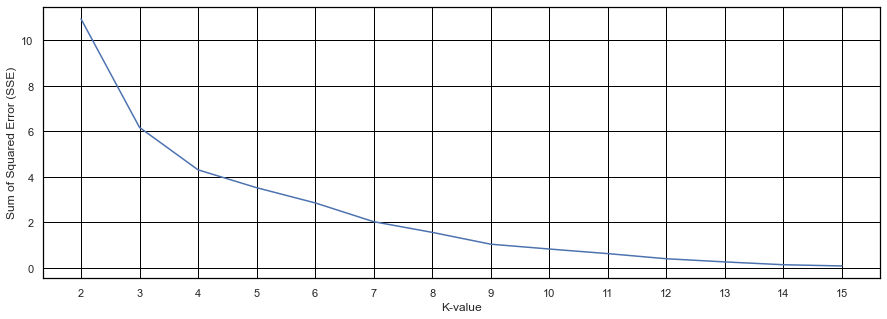

In [11]:
#Elbow method
plt.figure(figsize=(15, 5))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.plot(range(2, 16),inertia)
plt.xticks([i for i in range(2, 16)])
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Error (SSE)')
plt.grid(True,color='black')

#Range of k-value = {6,7,8}

In [12]:
#Silhouette Score Method
from sklearn import metrics

silhouette_score = []
for k in tqdm(range(2,19)):  #Max 19 cant exceed n_samples-1 (19 coins)
    
    kmeans= KMeans(n_clusters=k,random_state=seed,n_jobs=-1)
    kmeans.fit(X)
    silhouette= metrics.silhouette_score(X, kmeans.labels_,random_state=10)
    silhouette_score.append(silhouette)
    #print(silhouette)

100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 156.69it/s]


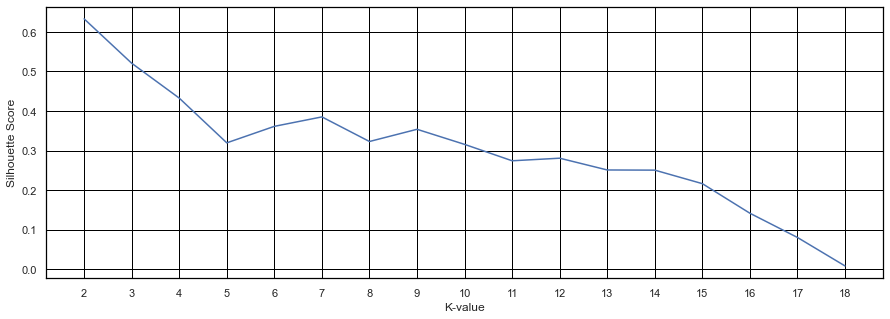

In [13]:
plt.figure(figsize=(15, 5))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
plt.plot(range(2, 19),silhouette_score)
plt.xticks([i for i in range(2, 19)])
plt.xlabel('K-value')
plt.ylabel('Silhouette Score')
plt.grid(True,color='black')
#Range of k-value={6,7,8}
#Range of k can be calculated through krish naik video.

Considering both tests taking k=6 (as 6 has more silhouette score than 7)

In [14]:
n_clusters1=5
k_means= KMeans(n_clusters= n_clusters1,n_jobs=-1,random_state=seed)
k_means.fit(X)
target_labels= k_means.predict(X)
print(target_labels)
centroids = k_means.cluster_centers_
print(centroids)

[2 4 1 3 0 0 4 1 1 3 3 4 1 4 4 1 2 4 2]
[[ 1.9755081   1.16505136]
 [-0.35015692  0.18859435]
 [-0.22101539 -1.53342004]
 [ 1.21603994  1.38111247]
 [-0.86421754 -0.46935863]]


In [15]:
cluster_labels1= k_means.labels_
#cluister_labels1

Text(0, 0.5, 'Annualized Volatility')

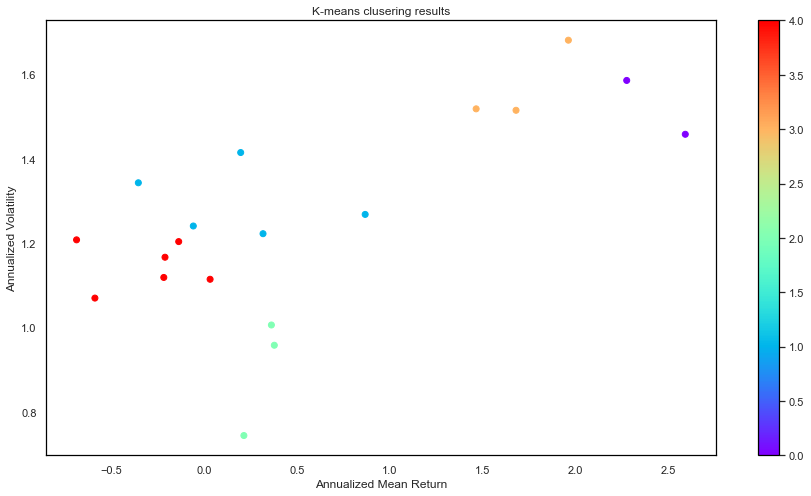

In [16]:
#centroids[:,0]
#centroids[:,:1]
plt.figure(figsize=(15,8))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.scatter(centroids[:,0],centroids[:,1],marker='*',linewidth=4)
#plt.scatter(X.iloc[:,0],X.iloc[:,1],c=cluster_labels1,cmap ="rainbow")
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=cluster_labels1,cmap ="rainbow")
plt.colorbar()
plt.grid(True)
plt.title('K-means clusering results')
plt.xlabel('Annualized Mean Return')
plt.ylabel('Annualized Volatility')

In [17]:
clustered_series1 = pd.Series(index= X.index, data= k_means.labels_)

In [18]:
clustered_series1[clustered_series1==1]

SUSHI    1
DOGE     1
BAT      1
LINK     1
ADA      1
dtype: int32

In [19]:
clustered_series1.value_counts()

4    6
1    5
2    3
3    3
0    2
dtype: int64

In [20]:
#plt.barh(clustered_series.value_counts(), width=range(0,len(clustered_series)))

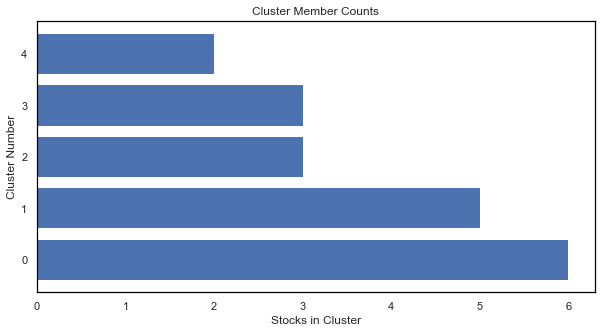

In [21]:
#showing number of stocks in each cluster
#sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
clustered_series = pd.Series(index=X.index, data=k_means.labels_)

plt.figure(figsize=(10,5))
plt.barh(range(len(clustered_series1.value_counts())),clustered_series1.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

## Agglomerative clustering

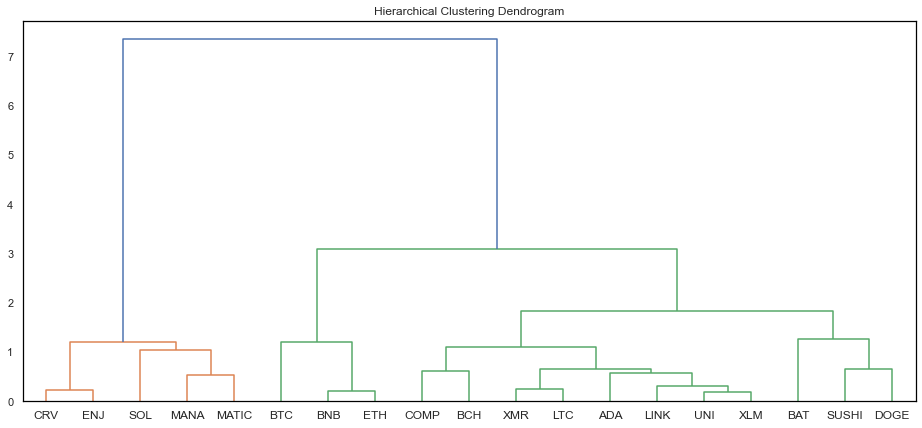

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

def plot_dendrogram(Y,model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    '''
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    '''
    linkage_matrix=linkage(X, method='ward')
    # Plot the corresponding dendrogram
    plt.figure(figsize=(16,7))
    plt.title("Hierarchical Clustering Dendrogram")
    dendrogram(linkage_matrix,labels = Y.index, **kwargs)
    return linkage_matrix


#iris = load_iris()
#X = iris.data
#Y=[[12,13],[15,25],[17,30]]
#Y=[[12,13,19],[15,25,17],[21,20,16],[12,78,1000]]
# setting distance_threshold=0 ensures we compute the full tree.
agglomerative = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

agglomerative = agglomerative.fit(X)
# plot the top three levels of the dendrogram
linkage_matrix=plot_dendrogram(X,agglomerative, truncate_mode="level", p=30)
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")

In [23]:
distance_threshold = 1.5
clusters = fcluster(linkage_matrix, distance_threshold, criterion='distance')
#The fcluster() method forms flat clusters from the hierarchical clustering. 
#This hierarchical clustering is defined by the given linkage matrix, identifying a link between clustered classes.
chosen_clusters = pd.Series(data=clusters,index= X.index)
np.sort(chosen_clusters.unique())

array([1, 2, 3, 4])

In [24]:
n_clusters2=6
agglomerative= AgglomerativeClustering(n_clusters=n_clusters2, affinity = 'euclidean', linkage = 'ward')
cluster_labels2 = agglomerative.fit_predict(X)

In [25]:
clustered_series2 = pd.Series(index= X.index, data= cluster_labels2)
np.sort(clustered_series2.unique())

array([0, 1, 2, 3, 4, 5], dtype=int64)

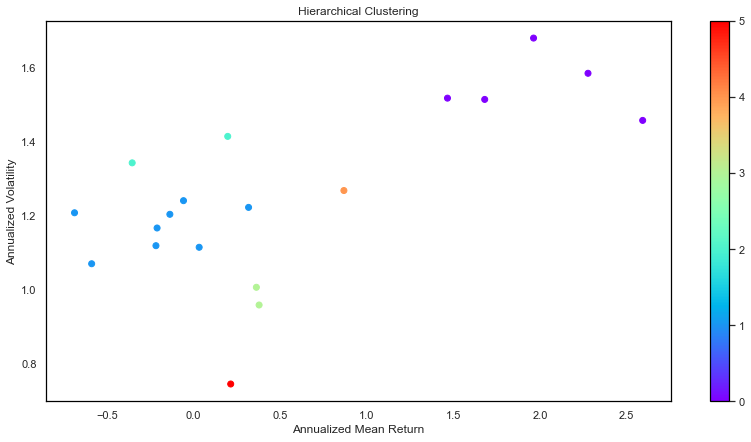

In [26]:
plt.figure(figsize=(14,7))
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.scatter(X.iloc[:,0],X.iloc[:,1], c =cluster_labels2,cmap='rainbow')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c =cluster_labels2,cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annualized Mean Return')
plt.ylabel('Annualized Volatility')
plt.colorbar()

## Affinity Propagation

In [27]:
for i in tqdm(range(5,35)):
    affine = AffinityPropagation(random_state=seed,damping=0.5,convergence_iter=i,verbose=True)
    affine.fit(X)
    silhouette= metrics.silhouette_score(X,affine.predict(X),random_state=10)
    print(">> Silhouette Score at {0} is {1}% ".format(i,np.round(silhouette*100,3)))
    

 87%|██████████████████████████████████████████████████████████████████████▏          | 26/30 [00:00<00:00, 126.40it/s]

Converged after 11 iterations.
>> Silhouette Score at 5 is 52.082% 
Converged after 12 iterations.
>> Silhouette Score at 6 is 52.082% 
Converged after 13 iterations.
>> Silhouette Score at 7 is 52.082% 
Converged after 14 iterations.
>> Silhouette Score at 8 is 52.082% 
Converged after 15 iterations.
>> Silhouette Score at 9 is 52.082% 
Converged after 16 iterations.
>> Silhouette Score at 10 is 52.082% 
Converged after 17 iterations.
>> Silhouette Score at 11 is 52.082% 
Converged after 18 iterations.
>> Silhouette Score at 12 is 52.082% 
Converged after 19 iterations.
>> Silhouette Score at 13 is 52.082% 
Converged after 20 iterations.
>> Silhouette Score at 14 is 52.082% 
Converged after 21 iterations.
>> Silhouette Score at 15 is 52.082% 
Converged after 22 iterations.
>> Silhouette Score at 16 is 52.082% 
Converged after 23 iterations.
>> Silhouette Score at 17 is 52.082% 
Converged after 24 iterations.
>> Silhouette Score at 18 is 52.082% 
Converged after 25 iterations.
>> Silho

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 117.59it/s]

>> Silhouette Score at 31 is 52.082% 
Converged after 38 iterations.
>> Silhouette Score at 32 is 52.082% 
Converged after 39 iterations.
>> Silhouette Score at 33 is 52.082% 
Converged after 40 iterations.
>> Silhouette Score at 34 is 52.082% 


In [28]:
#convergence_iter is max till 10
affinity = AffinityPropagation(random_state=seed,damping=0.5,convergence_iter=10)
affinity2 = AffinityPropagation(random_state=seed,damping=0.5,convergence_iter=11)
affinity.fit(X)
affinity2.fit(X)
#requires no cluster value.

AffinityPropagation(convergence_iter=11, random_state=42)

In [29]:
cluster_labels3_1 = affinity.predict(X)  #With 10 iteration
cluster_labels3_2 = affinity2.predict(X)  #With 11 iteration
print(np.unique(cluster_labels3_1))
print(np.unique(cluster_labels3_2))

[0 1 2]
[0 1 2]


Text(19.0, 0.5, 'Annualized Volatility')

<Figure size 1008x504 with 0 Axes>

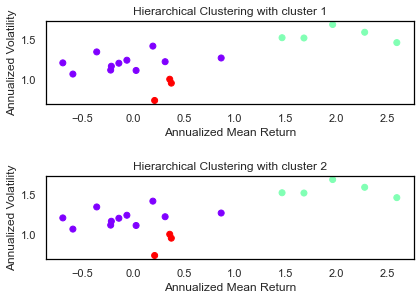

In [30]:
plt.figure(figsize=(14,7))
fig,ax= plt.subplots(2,1)
fig.tight_layout(h_pad=4)
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
#plt.scatter(X.iloc[:,0],X.iloc[:,1], c =cluster_labels2,cmap='rainbow')
ax[0].scatter(data.iloc[:,0],data.iloc[:,1], c =cluster_labels3_1,cmap='rainbow')
ax[1].scatter(data.iloc[:,0],data.iloc[:,1], c =cluster_labels3_2,cmap='rainbow')
ax[0].set_title('Hierarchical Clustering with cluster 1')
ax[1].set_title('Hierarchical Clustering with cluster 2')
ax[0].set_xlabel('Annualized Mean Return')
ax[1].set_xlabel('Annualized Mean Return')
ax[0].set_ylabel('Annualized Volatility')
ax[1].set_ylabel('Annualized Volatility')
#ax[0].set_colorbar()

## Collectively plotting the results

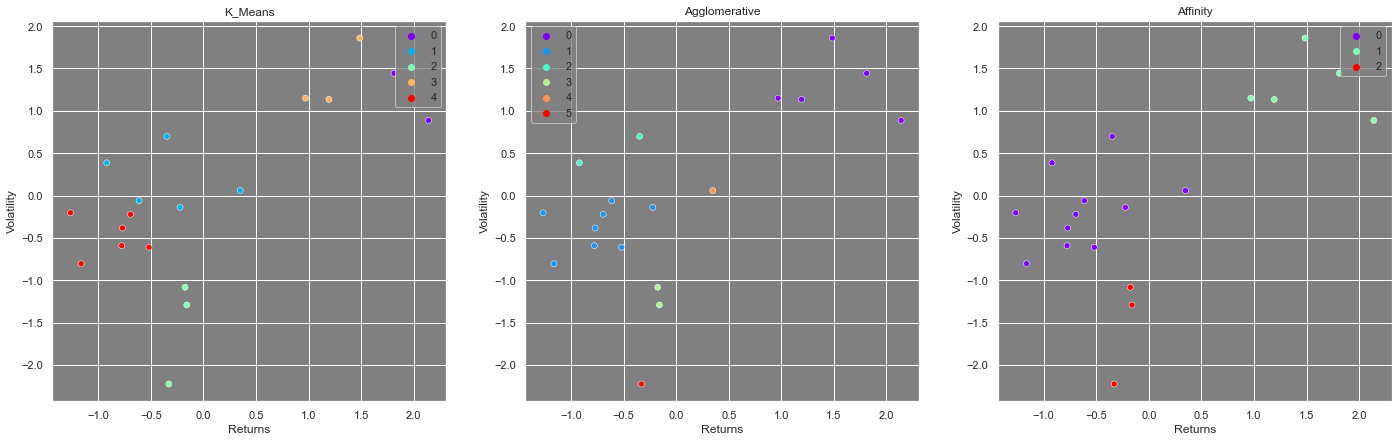

In [31]:
#Normalised Graphs
plt.figure(figsize=(24,7))
sns.set(rc={'axes.facecolor':'grey'})
i=1
for c in [[cluster_labels1, 'K_Means'],[cluster_labels2,'Agglomerative'],[cluster_labels3_1,'Affinity']]:
    plt.subplot(1,3,i)
    i+=1
    sns.scatterplot(X.iloc[:,0],X.iloc[:,1], hue =c[0],palette='rainbow')
    plt.title(c[1])

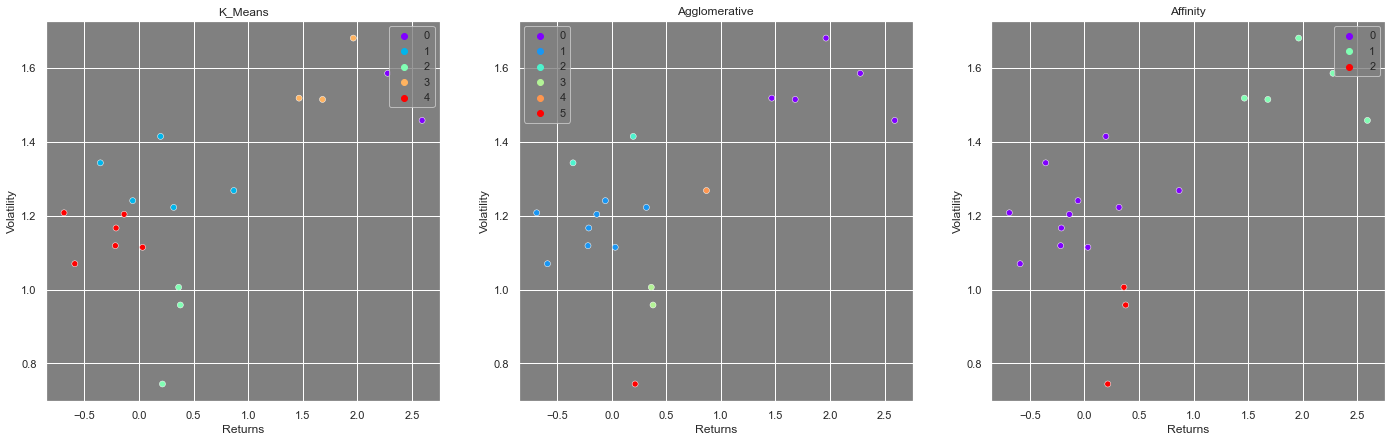

In [32]:
#Denormalised Graphs
plt.figure(figsize=(24,7))
sns.set(rc={'axes.facecolor':'grey'})
i=1
for c in [[cluster_labels1, 'K_Means'],[cluster_labels2,'Agglomerative'],[cluster_labels3_1,'Affinity']]:
    plt.subplot(1,3,i)
    i+=1
    sns.scatterplot(data.iloc[:,0],data.iloc[:,1], hue =c[0],palette='rainbow')
    plt.title(c[1])

## Selecting best model

In [33]:
print("KNN: {0}".format(metrics.silhouette_score(X, cluster_labels1,metric='euclidean',random_state=seed)))
print("Agglomerative: {0}".format(metrics.silhouette_score(X, cluster_labels2,metric='euclidean',random_state=seed)))
print("Affinity Propagation 1: {0}".format(metrics.silhouette_score(X, cluster_labels3_1,metric='euclidean',random_state=seed)))
print("Affinity Propagation 2: {0}".format(metrics.silhouette_score(X, cluster_labels3_2,metric='euclidean',random_state=seed)))

KNN: 0.31945362160347357
Agglomerative: 0.37855912592175744
Affinity Propagation 1: 0.5208157797324696
Affinity Propagation 2: 0.5208157797324696


In [34]:
cluster_labels3_1

array([2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2],
      dtype=int64)

In [35]:
#pwd

In [36]:
clustered_series= pd.Series(index=X.index, data= cluster_labels3_1)
counts= clustered_series.value_counts()
#cluster_vis = list

In [37]:
(counts[0])

11

In [38]:
clustered_series[clustered_series==1].index


Index(['CRV', 'SOL', 'MANA', 'MATIC', 'ENJ'], dtype='object')

In [39]:
len(np.unique(cluster_labels3_1))

3

In [40]:
plt.figure(figsize=(14,7))
cluster_list=[]
da1_pct=da1.pct_change(periods=24*12)

for i in range(0,len(np.unique(cluster_labels3_1))):
    if(counts[i]>1):
        cluster_list.append(clustered_series[clustered_series==i].index)
        
        
        
        
    
    

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='Observation Time', ylabel='Price'>

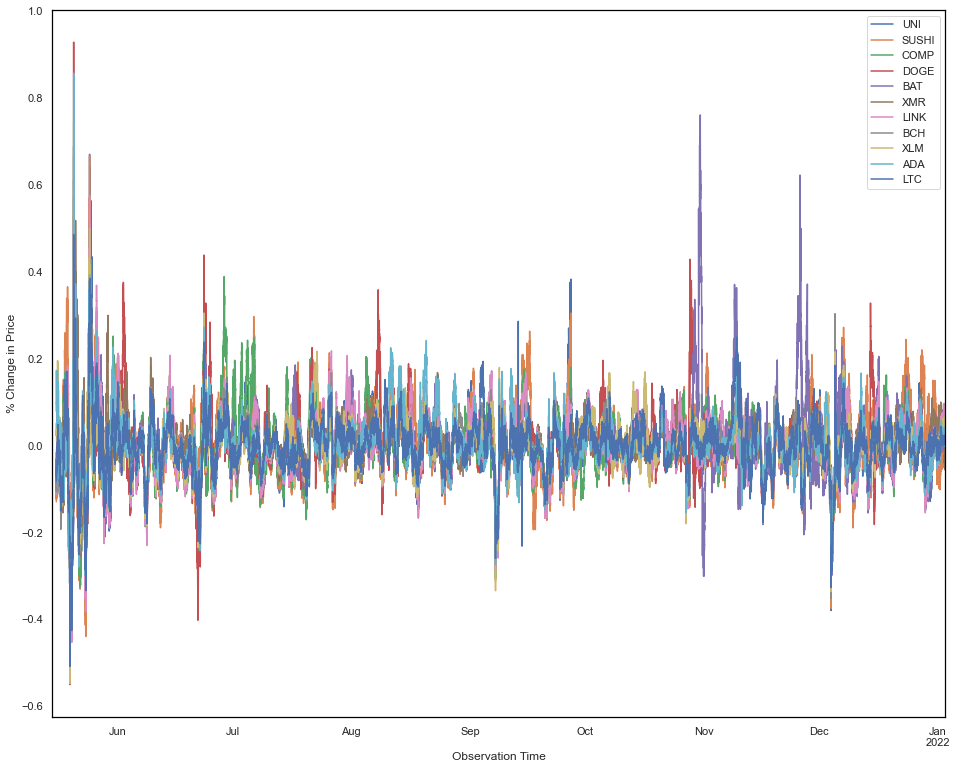

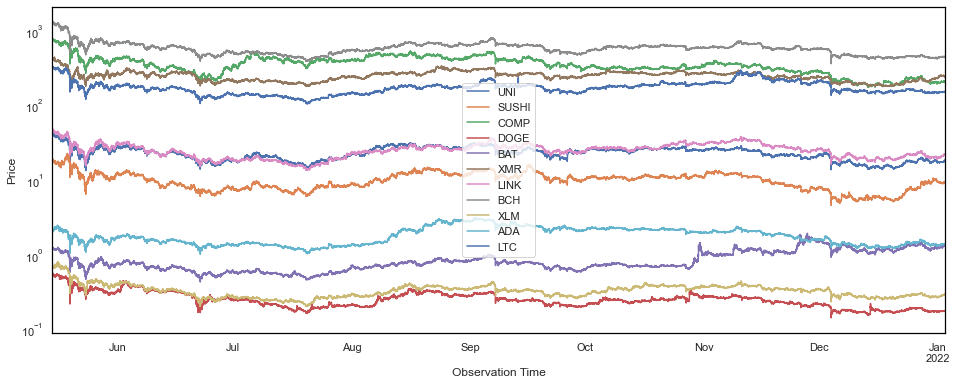

In [41]:
sns.set(rc={'axes.facecolor':'white','axes.edgecolor':'black'})
da1_pct[cluster_list[0]].plot(figsize=(16,13),xlabel= 'Observation Time',ylabel= '% Change in Price')
da1[cluster_list[0]].plot(figsize=(16,6),logy=True,secondary_y='SOL',grid=True,xlabel='Observation Time',ylabel= 'Price')

<AxesSubplot:xlabel='Observation Time', ylabel='Log Price'>

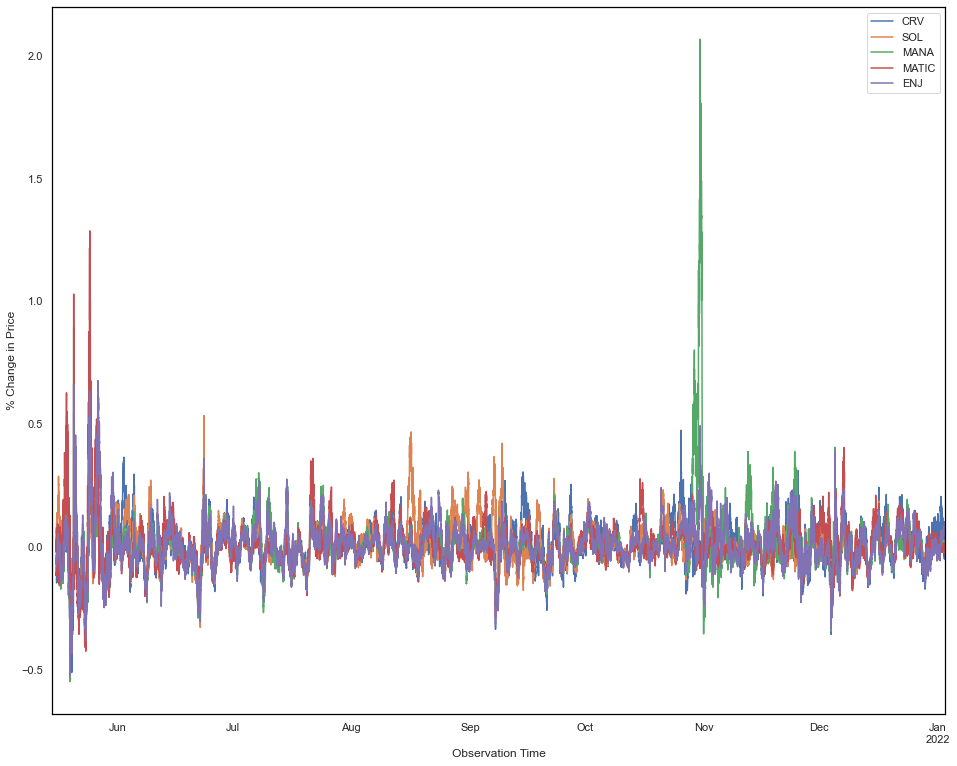

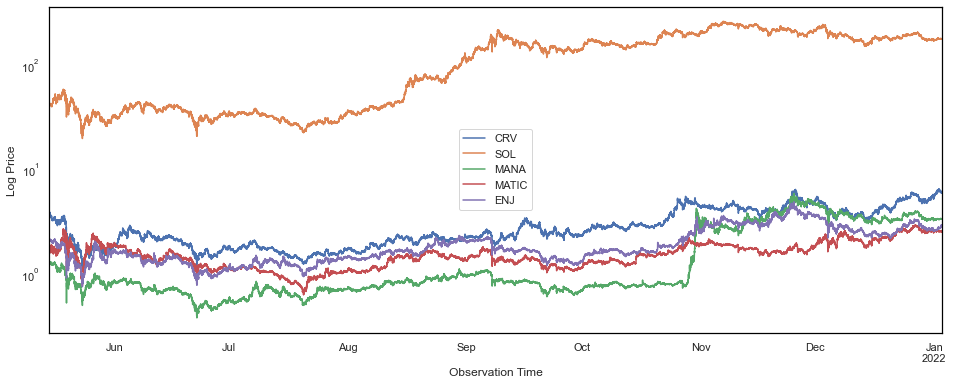

In [42]:
da1_pct[cluster_list[1]].plot(figsize=(16,13),xlabel= 'Observation Time',ylabel= '% Change in Price')
da1[cluster_list[1]].plot(figsize=(16,6),logy=True,secondary_y=['COMP','BCH','LTC'],xlabel='Observation Time',ylabel= 'Log Price')
#da1[cluster_list[1]].plot(figsize=(16,6),subplots=[('COMP', 'BTC'), ('LTC', 'DOGE')] )

<AxesSubplot:xlabel='Observation Time', ylabel='Log Price'>

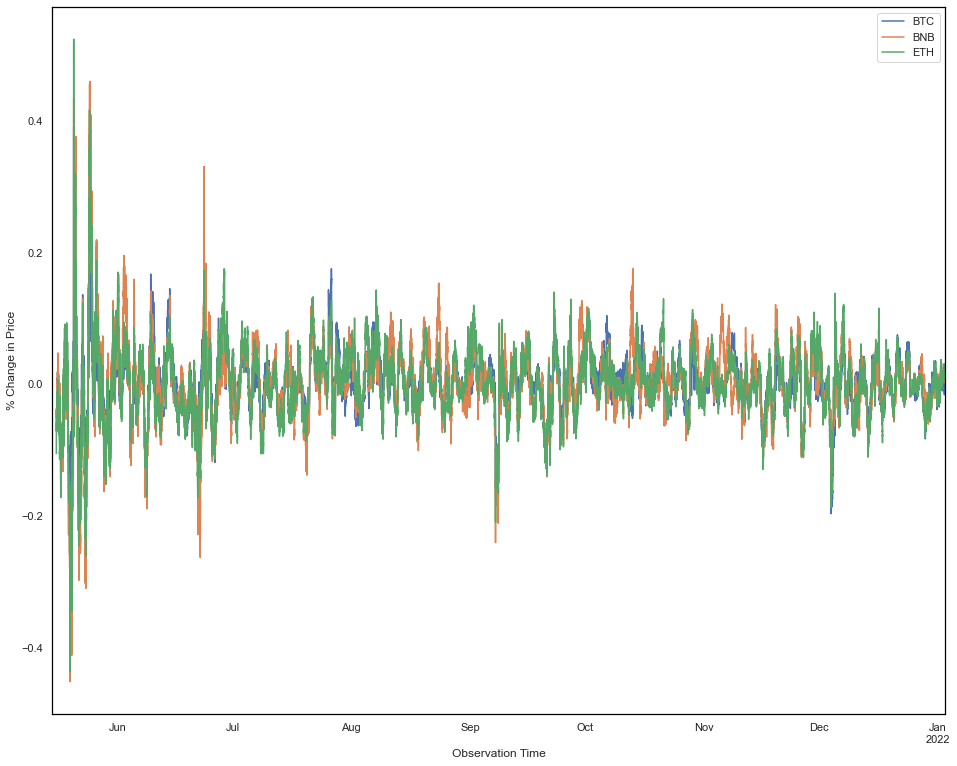

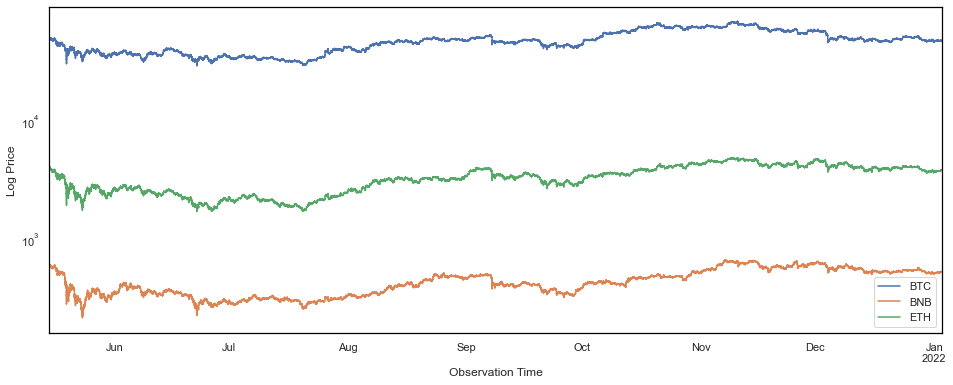

In [43]:
da1_pct[cluster_list[2]].plot(figsize=(16,13),xlabel= 'Observation Time',ylabel= '% Change in Price')
da1[cluster_list[2]].plot(figsize=(16,6),grid=True,logy=True,xlabel='Observation Time',ylabel= 'Log Price')

In [44]:
cluster_list[0]

Index(['UNI', 'SUSHI', 'COMP', 'DOGE', 'BAT', 'XMR', 'LINK', 'BCH', 'XLM',
       'ADA', 'LTC'],
      dtype='object')

## Statistical Tests:
ADF(Dicky Fuller) Test>>
Cointegration Test>>
2 step Engle-Granger Approach with Error correcting model.

In [45]:
da1=da_1[st:en_mid]

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
#ADF test
def ADFtest(df,clust_list):
    clust_list1=[]
    
    for i in tqdm_notebook(range(0,len(np.unique(cluster_labels3_1))),desc='Cluster Checking'):
        temp=[]
        for stock in tqdm_notebook(list(clust_list[i])):
            result=adfuller(df[stock])
            #print('p-value: {0} for {1}'.format(result[1],stock))
            if(result[1]<=0.05):
                pass
                #print("Against Null hypo data is stationary")
            else:
                #print("For Null hypo data is not stationary")
                temp.append(stock)
                print(stock)
        clust_list1.append(temp)
        
    return clust_list1
            

In [48]:
cluster_list1= ADFtest(da1,cluster_list)

Cluster Checking:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

BAT
ADA


  0%|          | 0/5 [00:00<?, ?it/s]

CRV
SOL
MANA
MATIC
ENJ


  0%|          | 0/3 [00:00<?, ?it/s]

BTC
BNB
ETH


In [49]:
da1_diff=pd.DataFrame()
for i in coin:
    da1_diff[i]=da1[i]-da1[i].shift(1)
da1_diff.fillna(method='bfill',inplace=True)
da1.fillna(method='bfill',inplace=True)
da1_diff_1=da1_diff.shift(1)
da1_diff_1.fillna(method='bfill',inplace=True)

In [50]:
def ADFtest_diff(df,clust_list):
    clust_list1=[]
    
    for i in tqdm_notebook(range(0,len(np.unique(cluster_labels3_1))),desc='Cluster Checking'):
        temp=[]
        for stock in tqdm_notebook(list(clust_list[i])):
            result=adfuller(df[stock])
            #print('p-value: {0} for {1}'.format(result[1],stock))
            if(result[1]<=0.05):
                temp.append(stock)
                print(stock)
                #print("Against Null hypo data is stationary")
                
        clust_list1.append(temp)
        
    return clust_list1

In [51]:
cluster_list1_final= ADFtest_diff(da1_diff,cluster_list1)

Cluster Checking:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

BAT
ADA


  0%|          | 0/5 [00:00<?, ?it/s]

CRV
SOL
MANA
MATIC
ENJ


  0%|          | 0/3 [00:00<?, ?it/s]

BTC
BNB
ETH


In [53]:
print(cluster_list)
print(cluster_list1)
print(cluster_list1_final)

[Index(['UNI', 'SUSHI', 'COMP', 'DOGE', 'BAT', 'XMR', 'LINK', 'BCH', 'XLM',
       'ADA', 'LTC'],
      dtype='object'), Index(['CRV', 'SOL', 'MANA', 'MATIC', 'ENJ'], dtype='object'), Index(['BTC', 'BNB', 'ETH'], dtype='object')]
[['BAT', 'ADA'], ['CRV', 'SOL', 'MANA', 'MATIC', 'ENJ'], ['BTC', 'BNB', 'ETH']]
[['BAT', 'ADA'], ['CRV', 'SOL', 'MANA', 'MATIC', 'ENJ'], ['BTC', 'BNB', 'ETH']]


In [99]:
#Coint Test
def coint(df):
    pair=pd.DataFrame()
    for i in tqdm(df.columns):
        for j in tqdm_notebook(df.columns):
            if i!=j:
                Y = df[i]
                X = df[j]
                X= sm.add_constant(X)
                model = sm.OLS(Y,X)
                results = model.fit()
                resid_dumm= pd.DataFrame(results.resid)
                p_value=adfuller(resid_dumm)
                if p_value[1]<0.05:
                    pair[(i,j)]= pd.DataFrame(results.resid) 
    return pair

In [55]:
pair0=  coint(da1[cluster_list1_final[0]])

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

 50%|██████████████████████████████████████████                                          | 1/2 [00:11<00:11, 11.75s/it]

  0%|          | 0/2 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:23<00:00, 11.57s/it]


In [61]:
pair0

""


In [56]:
pair1=  coint(da1[cluster_list1_final[1]])

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|████████████████▊                                                                   | 1/5 [00:46<03:06, 46.65s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 40%|█████████████████████████████████▌                                                  | 2/5 [01:32<02:18, 46.08s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [02:18<01:32, 46.27s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [03:05<00:46, 46.36s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:52<00:00, 46.51s/it]


In [62]:
pair1

,"(CRV, MANA)","(MANA, CRV)","(MANA, ENJ)","(MATIC, CRV)","(ENJ, CRV)","(ENJ, MANA)"
ts,,,,,,
2021-05-15 00:00:00,1.012747,-0.990381,-0.577990,-0.252216,-0.241880,0.343833
2021-05-15 00:05:00,1.049575,-1.023472,-0.584426,-0.214593,-0.257850,0.348017
2021-05-15 00:10:00,1.095480,-1.064856,-0.571757,-0.210870,-0.290887,0.340154
2021-05-15 00:15:00,1.067936,-1.041426,-0.565712,-0.160100,-0.280628,0.335858
2021-05-15 00:20:00,1.008443,-0.991885,-0.532510,-0.183857,-0.271895,0.313568
...,...,...,...,...,...,...
2022-01-02 23:40:00,1.741065,-1.061974,0.307978,0.103770,-0.794614,-0.038774
2022-01-02 23:45:00,1.758365,-1.079308,0.304065,0.108028,-0.802788,-0.036780
2022-01-02 23:50:00,1.764475,-1.085649,0.321998,0.099877,-0.817995,-0.048310


In [57]:
pair2=  coint(da1[cluster_list1_final[2]])

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|████████████████████████████                                                        | 1/3 [00:25<00:50, 25.31s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:51<00:26, 26.01s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:14<00:00, 24.71s/it]


In [63]:
pair2

,"(BNB, ETH)","(ETH, BNB)"
ts,,
2021-05-15 00:00:00,65.521026,-399.878543
2021-05-15 00:05:00,67.624380,-415.161565
2021-05-15 00:10:00,67.516652,-415.390382
2021-05-15 00:15:00,67.328805,-416.090406
2021-05-15 00:20:00,66.985085,-417.744260
...,...,...
2022-01-02 23:40:00,25.992405,-136.207572
2022-01-02 23:45:00,26.222719,-137.769742
2022-01-02 23:50:00,25.996684,-136.729316


In [64]:
def ECM(df,df_diff,df_diff_1,pairi):
    
    sel_pair=[]
    error_coeff=[]
    
    for i in tqdm(pairi.columns):
    
        y=pd.DataFrame()
        y= pd.DataFrame(df_diff[i[0]]) ###(Dependent,independent)
        X=pd.DataFrame()
        #X[str(i[0])+"1"]=df_diff_1[i[0]] #Extended eqn of Graner Approach.
        X[i[1]]=df_diff[i[1]]
        #X[str(i[1])+"1"]=-df_diff_1[i[1]].shift(1)  #re
        #X[str(i[0])+"0"]=df_diff_1[i[0]].shift(1)  #re
         
        X['residual']= pairi[i].shift(1)
        #X['residual'].fillna(method='bfill',inplace=True)
        X=sm.add_constant(X)
        X.fillna(method='bfill', inplace=True)
        y.fillna(method='bfill', inplace=True)
    
        #store= df[i[1]].shift(1)
        #store.fillna(method='bfill',inplace=True)
        #X[str(i[1])+'res']=df[i[1]]-store
    
    
        model=sm.OLS(y,X)
        results=model.fit()
        print("Error Coefficient of {0} pair is {1}".format(i,results.params.loc['residual']))
        print(results.summary())
        error_coeff.append(results.params.loc['residual'])
        sel_pair.append(i)
    
    
    ecm =pd.DataFrame()
    ecm['pairs']= sel_pair
    ecm['error_coeff']= error_coeff
    return ecm

In [65]:
sel_pair0= ECM(da1[cluster_list1_final[0]],da1_diff[cluster_list1_final[0]],da1_diff_1[cluster_list1_final[0]],pair0)

0it [00:00, ?it/s]


In [66]:
sel_pair1= ECM(da1[cluster_list1_final[1]],da1_diff[cluster_list1_final[1]],da1_diff_1[cluster_list1_final[1]],pair1)

 17%|██████████████                                                                      | 1/6 [00:00<00:01,  4.65it/s]

Error Coefficient of ('CRV', 'MANA') pair is -0.000226230277100253
                            OLS Regression Results                            
Dep. Variable:                    CRV   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3833.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:31   Log-Likelihood:             1.8210e+05
No. Observations:               67105   AIC:                        -3.642e+05
Df Residuals:                   67102   BIC:                        -3.642e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  4.77it/s]

Error Coefficient of ('MANA', 'CRV') pair is -0.00022684826896249375
                            OLS Regression Results                            
Dep. Variable:                   MANA   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3836.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:31   Log-Likelihood:             1.9771e+05
No. Observations:               67105   AIC:                        -3.954e+05
Df Residuals:                   67102   BIC:                        -3.954e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00,  4.88it/s]

                            OLS Regression Results                            
Dep. Variable:                   MANA   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:31   Log-Likelihood:             2.0438e+05
No. Observations:               67105   AIC:                        -4.088e+05
Df Residuals:                   67102   BIC:                        -4.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.389e-05   4.44e-05      0.538      0.5

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:00<00:00,  4.86it/s]

                            OLS Regression Results                            
Dep. Variable:                  MATIC   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                 1.000e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:             2.2096e+05
No. Observations:               67105   AIC:                        -4.419e+05
Df Residuals:                   67102   BIC:                        -4.419e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.689e-06   3.47e-05      0.164      0.8

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:01<00:00,  4.92it/s]

                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     8908.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:             2.1220e+05
No. Observations:               67105   AIC:                        -4.244e+05
Df Residuals:                   67102   BIC:                        -4.244e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.298e-07   3.95e-05     -0.006      0.9

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.84it/s]

                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:32   Log-Likelihood:             2.1461e+05
No. Observations:               67105   AIC:                        -4.292e+05
Df Residuals:                   67102   BIC:                        -4.292e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.637e-06   3.81e-05     -0.069      0.9

In [67]:
sel_pair2= ECM(da1[cluster_list1_final[2]],da1_diff[cluster_list1_final[2]],da1_diff_1[cluster_list1_final[2]],pair2)

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  3.00it/s]

Error Coefficient of ('BNB', 'ETH') pair is -0.0003110263379823349
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                 7.946e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:33   Log-Likelihood:                -79818.
No. Observations:               67105   AIC:                         1.596e+05
Df Residuals:                   67102   BIC:                         1.597e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.66it/s]

                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                 7.944e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:41:33   Log-Likelihood:            -2.1113e+05
No. Observations:               67105   AIC:                         4.223e+05
Df Residuals:                   67102   BIC:                         4.223e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.022      0.096      0.9

In [68]:
sel_pair0.sort_values(by='error_coeff')

,pairs,error_coeff


In [69]:
sel_pair1.sort_values(by='error_coeff')

,pairs,error_coeff
5,"(ENJ, MANA)",-0.000616
3,"(MATIC, CRV)",-0.000566
4,"(ENJ, CRV)",-0.000395
2,"(MANA, ENJ)",-0.000360
1,"(MANA, CRV)",-0.000227
0,"(CRV, MANA)",-0.000226


In [70]:
sel_pair2.sort_values(by='error_coeff')

,pairs,error_coeff
0,"(BNB, ETH)",-0.000311
1,"(ETH, BNB)",-0.000180


In [154]:
class Run:
    def __init__(self, da1,coin, level=0):
        self.level = level
        self.coin= coin
        self.da1 = da1
        self.entry_time=[]                          #Trade entry time
        self.exit_time=[]                           #Trade exit time
        self.signal_entry=[]                        #Entry trade signal
        self.signal_exit=[]                         #Exit trade signal
        self.entry_spread=[]                        #Storing entering original spread.
        self.exit_spread=[]                         #Storing exiting original spread.
        self.p1=[]
        self.p1_exit=[]
        self.p2=[]
        self.p2_exit=[]
        self.p1_quant=[]
        self.p2_quant=[]
        self.p1_entry_dir=[]
        self.p2_entry_dir=[]
        self.hedge_ratio=[]
        self.pnl1=[]
        self.pnl2=[]
        self.pnl=[]
        self.total_pnl=[]



        self.capital=[]
        self.cap = 1e5
        
    def zscore(self, series):
        return (series - series.mean())/np.std(series)
        #return (series - da_1[datetime.datetime(2021, 5, 15 , 0, 0):en_mid].mean())/np.std(da_1[datetime.datetime(2021, 5, 15 , 0, 0):en_mid])
    
    def level_crosses(self, series, level):
        change = 0
        if series[1]>level and series[0]<level:
            change=1
        elif series[1]<level and series[0]>level:
            change=-1
        else:
            change=0
        return change

    def run(self):
        st = datetime.datetime(2021, 5, 15 , 0, 0)
        #st= datetime.datetime(2022, 1, 3, 0, 0)
        #en = datetime.datetime(2022, 4, 3, 0, 0)       #end date
        en= datetime.datetime(2022, 1, 3, 0, 0)
        en1=st+datetime.timedelta(days=1)               #rolling end date

        entry_level=0
        open_pos=False
        coin1_dir = None

        while(en1<en-datetime.timedelta(minutes=5)):
            #Data Loading and Regression in every 5 min
            data=self.da1[st:en1]
            r=sm.OLS(data[self.coin[0]],data[self.coin[1]]).fit() #(MANA,ADA)
            hedge=r.params
            data['spread']=data[self.coin[0]]-data[self.coin[1]]*hedge[0]
            data['n_spread']= self.zscore(data['spread'])

            upper_trading=self.level_crosses(data['n_spread'].tail(2), level=1)
            lower_trading=self.level_crosses(data['n_spread'].tail(2), level=-1)
            upper_stop=self.level_crosses(data['n_spread'].tail(2), level=2)
            lower_stop=self.level_crosses(data['n_spread'].tail(2), level=-2)
            mean=self.level_crosses(data['n_spread'].tail(2), level=0)


            #Trading signals
            if open_pos==True:

                if (upper_stop == 1 and f==1) or (lower_stop == -1 and f==-1):
                    open_pos=False
                    self.signal_exit.append('Stop Loss Hit')
                    #profits.append(-abs(data['spread'].tail(1)[0]-entry_level)*Qt)
                    #profits_per.append(-abs(data['spread'].tail(1)[0]-entry_level))
                    #cum_profits.append(np.sum(profits))
                    #cum_profits_per.append(np.sum(profits_per))
                    #self.cap=self.cap+profits[-1]
                    #self.capital.append(self.cap+cum_profits[-1])
                    self.exit_spread.append(data['spread'].tail(1)[0])
                    self.exit_time.append(data['n_spread'].tail(1).index[0])
                    self.p1_exit.append(data[self.coin[0]].tail(1)[0])
                    self.p2_exit.append(data[self.coin[1]].tail(1)[0])
                    print("Time : ", self.exit_time[-1])
                    print(f'====>Exiting {self.coin[1]} at price {self.p2_exit[-1]}, quantity : {Qt2}')
                    print(f'-----Exiting {self.coin[0]} at price {self.p1_exit[-1]}, quantity : {Qt1}')

                    if coin1_dir == 'sell':
                        self.pnl1.append((self.p1[-1]-self.p1_exit[-1])*Qt1)
                        self.pnl2.append((self.p2_exit[-1]-self.p2[-1])*Qt2)
                    else:
                        self.pnl1.append((self.p1_exit[-1]-self.p1[-1])*Qt1)
                        self.pnl2.append((self.p2[-1]-self.p2_exit[-1])*Qt2)

                    self.pnl.append(self.pnl1[-1] + self.pnl2[-1])
                    self.total_pnl.append(np.sum(self.pnl))

                    print(f'self.pnl1 : {self.pnl1[-1]} , self.pnl2 : {self.pnl2[-1]}, pnl : {self.pnl[-1]}, total_pnl : {self.total_pnl[-1]} ')

                elif mean!=0:
                    open_pos=False
                    self.signal_exit.append('Target Hit')
                    #profits.append(abs(data['spread'].tail(1)[0] - entry_level)*Qt)
                    #profits_per.append(abs(data['spread'].tail(1)[0] - entry_level))
                    #self.cap=self.cap+profits[-1]
                    #cum_profits.append(np.sum(profits))
                    #cum_profits_per.append(np.sum(profits_per))
                    #self.capital.append(self.cap+cum_profits[-1])

                    self.exit_spread.append(data['spread'].tail(1)[0])
                    self.exit_time.append(data['n_spread'].tail(1).index[0])
                    self.p1_exit.append(data[self.coin[0]].tail(1)[0])
                    self.p2_exit.append(data[self.coin[1]].tail(1)[0])
                    print("Time : ", self.exit_time[-1])
                    print(f'====>Exiting {self.coin[1]} at price {self.p2_exit[-1]}, quantity : {Qt2}')
                    print(f'-----Exiting {self.coin[0]} at price {self.p1_exit[-1]}, quantity : {Qt1}')

                    if coin1_dir == 'sell':
                        self.pnl1.append((self.p1[-1]-self.p1_exit[-1])*Qt1)
                        self.pnl2.append((self.p2_exit[-1]-self.p2[-1])*Qt2)
                    else:
                        self.pnl1.append((self.p1_exit[-1]-self.p1[-1])*Qt1)
                        self.pnl2.append((self.p2[-1]-self.p2_exit[-1])*Qt2)

                    self.pnl.append(self.pnl1[-1] + self.pnl2[-1])
                    self.total_pnl.append(np.sum(self.pnl))

                    print(f'self.pnl1 : {self.pnl1[-1]} , self.pnl2 : {self.pnl2[-1]}, pnl : {self.pnl[-1]}, total_pnl : {self.total_pnl[-1]} ')
                    #print(data['n_spread'].tail(2))

                    #print("MANA exit price is {0} and ADA is {1} with mean {2} ".format(self.p1_exit[-1],self.p2_exit[-1],mean))


            else:
                if(upper_trading==-1 or lower_trading==1):
                    open_pos=True
                    #self.p1.append(data[''])
                    self.p1.append(data[self.coin[0]].tail(1)[0])
                    self.p2.append(data[self.coin[1]].tail(1)[0])
                   # print("MANA entry price is {0} and ADA is {1}".format(self.p1[-1],self.p2[-1]))
                    entry_level= data['spread'].tail(1)[0]
                    self.entry_time.append(data['n_spread'].tail(1).index[0])
                    #Qt1= int(np.floor((self.cap/2)/data[coin[0]].tail(1)[0]))
                    Qt1=(self.cap/((hedge[0])*self.p2[-1]+self.p1[-1]))
                    self.p1_quant.append(Qt1)
                    Qt2=(Qt1*(hedge[0]))
                    self.p2_quant.append(Qt2)
                    #Qt2= int(np.floor((self.cap/2)/data[coin[1]].tail(1)[0]))
                    #quantity.append((Qt1,Qt2))
                    #print(data['n_spread'].tail(2))
                    self.hedge_ratio.append(hedge[0])

                    self.entry_spread.append(data['spread'].tail(1)[0])
                    if upper_trading == -1:
                        self.signal_entry.append('Short Activate')
                        self.p1_entry_dir.append('Sell')
                        self.p2_entry_dir.append('Buy')

                        print('Hedge Ratio : ', hedge[0])
                        print("Time : ", data['n_spread'].tail(1).index[0])
                        print(f'====>Bought {self.coin[1]} at price {self.p2[-1]}, quantity : {Qt2}')
                        print(f'-----Sold {self.coin[0]} at price {self.p1[-1]}, quantity : {Qt1}')
                        coin1_dir = 'sell'
                        f=1
                        #print("Hedge ratio is" hedge[0])

                    else:
                        self.signal_entry.append('Buy Activate')
                        self.p1_entry_dir.append('Buy')
                        self.p2_entry_dir.append('Sell')

                        print('Hedge Ratio : ', hedge[0])
                        print("Time : ", data['n_spread'].tail(1).index[0])
                        print(f'====>Sold {self.coin[1]} at price {self.p2[-1]}, quantity : {Qt2}')
                        print(f'-----Bought {self.coin[0]} at price {self.p1[-1]}, quantity : {Qt1}')
                        coin1_dir = 'buy'
                        f=-1
                        #print("Hedge ratio is ",hedge[0])

            #Time shift by 5 min

            st=st+datetime.timedelta(minutes=5)
            en1=en1+datetime.timedelta(minutes=5)
        if(open_pos==True):
            self.exit_time.append("NA")
            self.signal_exit.append("NA")
            self.p1_exit.append("NA")
            self.p2_exit.append("NA")
            self.exit_spread.append('NA')
            self.pnl1.append('NA')
            self.pnl2.append('NA')
            self.total_pnl.append(self.total_pnl[-1])

In [122]:
#Backtested Result (7 day sample with regression in 5 min)
coin1=['ENJ', 'MANA']
#Storing different rolling sample day in 'coin1_train':
#-32150 1 day
#24922  2 day
#22417  3 day
#27207  4 day
#8563   5 day
#34277  6 day
#45623  7 day

trade = Run(da_1[st:en_mid],coin1)
trade.run()

coin1_train= [-32150,24922,22417,27207,8563,34277,45623]

Hedge Ratio :  1.6392628151506317
Time :  2021-05-21 00:35:00
====>Sold MANA at price 0.9849, quantity : 51600.90917253215
-----Bought ENJ at price 1.5623, quantity : 31478.118514992697
Time :  2021-05-24 02:40:00
====>Exiting MANA at price 0.6049, quantity : 51600.90917253215
-----Exiting ENJ at price 0.9587, quantity : 31478.118514992697
self.pnl1 : -19000.192335649594 , self.pnl2 : 19608.34548556222, pnl : 608.1531499126249, total_pnl : 608.1531499126249 
Hedge Ratio :  1.5871312921451073
Time :  2021-05-24 12:20:00
====>Bought MANA at price 0.7143, quantity : 69024.07830291548
-----Sold ENJ at price 1.1657, quantity : 43489.835179057634
Time :  2021-05-24 12:40:00
====>Exiting MANA at price 0.7411, quantity : 69024.07830291548
-----Exiting ENJ at price 1.168, quantity : 43489.835179057634
self.pnl1 : -100.0266209118312 , self.pnl2 : 1849.8452985181304, pnl : 1749.8186776062992, total_pnl : 2357.9718275189243 
Hedge Ratio :  1.5862201148120352
Time :  2021-05-24 13:30:00
====>Bought

Hedge Ratio :  1.8490928209069084
Time :  2021-06-12 19:10:00
====>Bought MANA at price 0.6742, quantity : 73699.62115567061
-----Sold ENJ at price 1.2623, quantity : 39857.17770486167
Time :  2021-06-12 20:15:00
====>Exiting MANA at price 0.6717, quantity : 73699.62115567061
-----Exiting ENJ at price 1.243, quantity : 39857.17770486167
self.pnl1 : 769.2435297038252 , self.pnl2 : -184.24905288918077, pnl : 584.9944768146444, total_pnl : 3410.03670398571 
Hedge Ratio :  1.8562097333712262
Time :  2021-06-13 09:20:00
====>Bought MANA at price 0.6564, quantity : 75516.58253144845
-----Sold ENJ at price 1.2396, quantity : 40683.21654272124
Time :  2021-06-13 11:40:00
====>Exiting MANA at price 0.6587, quantity : 75516.58253144845
-----Exiting ENJ at price 1.2237, quantity : 40683.21654272124
self.pnl1 : 646.8631430292687 , self.pnl2 : 173.68813982232908, pnl : 820.5512828515978, total_pnl : 4230.587986837308 
Hedge Ratio :  1.860911146759727
Time :  2021-06-13 18:55:00
====>Bought MANA at 

Hedge Ratio :  2.019031230264292
Time :  2021-06-29 21:50:00
====>Sold MANA at price 0.5514, quantity : 91095.32844344903
-----Bought ENJ at price 1.1031, quantity : 45118.33550564972
Time :  2021-06-29 22:00:00
====>Exiting MANA at price 0.5532, quantity : 91095.32844344903
-----Exiting ENJ at price 1.1206, quantity : 45118.33550564972
self.pnl1 : 789.5708713488732 , self.pnl2 : -163.97159119821043, pnl : 625.5992801506627, total_pnl : 4115.137101979 
Hedge Ratio :  2.017195952404974
Time :  2021-06-30 00:25:00
====>Sold MANA at price 0.5552, quantity : 90115.86062497373
-----Bought ENJ at price 1.1185, quantity : 44673.82582120212
Time :  2021-06-30 01:45:00
====>Exiting MANA at price 0.5467, quantity : 90115.86062497373
-----Exiting ENJ at price 1.1038, quantity : 44673.82582120212
self.pnl1 : -656.7052395716781 , self.pnl2 : 765.9848153122824, pnl : 109.27957574060429, total_pnl : 4224.416677719604 
Hedge Ratio :  2.0162043443735715
Time :  2021-06-30 03:05:00
====>Bought MANA at p

Time :  2021-07-04 05:00:00
====>Exiting MANA at price 0.5622, quantity : 91067.26158561737
-----Exiting ENJ at price 1.1943, quantity : 44752.802691745725
self.pnl1 : -3025.2894619620056 , self.pnl2 : 1620.9972562239925, pnl : -1404.292205738013, total_pnl : 3289.5668727926077 
Hedge Ratio :  2.0376818630867963
Time :  2021-07-04 07:55:00
====>Bought MANA at price 0.5816, quantity : 85343.79305702967
-----Sold ENJ at price 1.2025, quantity : 41882.78582788485
Time :  2021-07-04 16:25:00
====>Exiting MANA at price 0.5849, quantity : 85343.79305702967
-----Exiting ENJ at price 1.1931, quantity : 41882.78582788485
self.pnl1 : 393.69818678211146 , self.pnl2 : 281.6345170881953, pnl : 675.3327038703068, total_pnl : 3964.8995766629146 
Hedge Ratio :  2.040745275351561
Time :  2021-07-04 17:25:00
====>Sold MANA at price 0.5893, quantity : 85247.325933578
-----Bought ENJ at price 1.1913, quantity : 41772.644025302165
Time :  2021-07-05 00:00:00
====>Exiting MANA at price 0.568, quantity : 852

Time :  2021-07-20 13:30:00
====>Exiting MANA at price 0.5045, quantity : 96320.0587772637
-----Exiting ENJ at price 0.9699, quantity : 49998.86521426783
self.pnl1 : -1149.9738999281612 , self.pnl2 : 1762.6570756239346, pnl : 612.6831756957733, total_pnl : 12898.645616975979 
Hedge Ratio :  1.9277300862493891
Time :  2021-07-21 02:55:00
====>Sold MANA at price 0.5339, quantity : 93828.9571476921
-----Bought ENJ at price 1.0253, quantity : 48673.28565185526
Time :  2021-07-21 03:50:00
====>Exiting MANA at price 0.5369, quantity : 93828.9571476921
-----Exiting ENJ at price 1.038, quantity : 48673.28565185526
self.pnl1 : 618.1507277785586 , self.pnl2 : -281.48687144307655, pnl : 336.663856335482, total_pnl : 13235.309473311461 
Hedge Ratio :  1.9276843191247586
Time :  2021-07-21 04:55:00
====>Bought MANA at price 0.5576, quantity : 89064.17497146573
-----Sold ENJ at price 1.0895, quantity : 46202.67649005115
Time :  2021-07-21 06:05:00
====>Exiting MANA at price 0.5519, quantity : 89064.

Hedge Ratio :  1.8712104891775472
Time :  2021-07-26 07:35:00
====>Bought MANA at price 0.7169, quantity : 69120.51834301939
-----Sold ENJ at price 1.3657, quantity : 36938.93270842016
Time :  2021-07-26 18:20:00
====>Exiting MANA at price 0.7337, quantity : 69120.51834301939
-----Exiting ENJ at price 1.3716, quantity : 36938.93270842016
self.pnl1 : -217.93970297967954 , self.pnl2 : 1161.2247081627283, pnl : 943.2850051830488, total_pnl : 13927.579869624018 
Hedge Ratio :  1.8725822380375592
Time :  2021-07-27 03:00:00
====>Bought MANA at price 0.6407, quantity : 77214.68199712508
-----Sold ENJ at price 1.2254, quantity : 41234.3342944687
Time :  2021-07-27 09:30:00
====>Exiting MANA at price 0.7128, quantity : 77214.68199712508
-----Exiting ENJ at price 1.3288, quantity : 41234.3342944687
self.pnl1 : -4263.630166048061 , self.pnl2 : 5567.178571992714, pnl : 1303.5484059446526, total_pnl : 15231.12827556867 
Hedge Ratio :  1.8764066689186731
Time :  2021-07-27 23:20:00
====>Bought MANA

Hedge Ratio :  1.96348033360197
Time :  2021-08-10 20:10:00
====>Sold MANA at price 0.8328, quantity : 60452.23343327557
-----Bought ENJ at price 1.6128, quantity : 30788.306049583403
Time :  2021-08-10 23:25:00
====>Exiting MANA at price 0.8245, quantity : 60452.23343327557
-----Exiting ENJ at price 1.6191, quantity : 30788.306049583403
self.pnl1 : 193.96632811237458 , self.pnl2 : 501.7535374961857, pnl : 695.7198656085602, total_pnl : 15325.117876809341 
Hedge Ratio :  1.9681013089963133
Time :  2021-08-11 19:50:00
====>Bought MANA at price 0.8413, quantity : 58915.24683380472
-----Sold ENJ at price 1.6848, quantity : 29935.06816163348
Time :  2021-08-11 21:20:00
====>Exiting MANA at price 0.8278, quantity : 58915.24683380472
-----Exiting ENJ at price 1.6296, quantity : 29935.06816163348
self.pnl1 : 1652.4157625221721 , self.pnl2 : -795.3558322563676, pnl : 857.0599302658045, total_pnl : 16182.177807075146 
Hedge Ratio :  1.9711003454142806
Time :  2021-08-12 08:50:00
====>Sold MANA 

Hedge Ratio :  2.170915723407714
Time :  2021-08-29 17:35:00
====>Sold MANA at price 1.0153, quantity : 49904.60876157578
-----Bought ENJ at price 2.146, quantity : 22987.814876221855
Time :  2021-08-29 19:40:00
====>Exiting MANA at price 1.0041, quantity : 49904.60876157578
-----Exiting ENJ at price 2.18, quantity : 22987.814876221855
self.pnl1 : 781.5857057915489 , self.pnl2 : 558.9316181296537, pnl : 1340.5173239212027, total_pnl : 27610.055988837357 
Hedge Ratio :  2.1652569606739696
Time :  2021-08-29 22:05:00
====>Sold MANA at price 1.018, quantity : 49693.410092038546
-----Bought ENJ at price 2.153, quantity : 22950.352311335235
Time :  2021-08-30 00:35:00
====>Exiting MANA at price 1.0851, quantity : 49693.410092038546
-----Exiting ENJ at price 2.241, quantity : 22950.352311335235
self.pnl1 : 2019.6310033975024 , self.pnl2 : -3334.4278171757833, pnl : -1314.796813778281, total_pnl : 26295.259175059076 
Hedge Ratio :  2.160019899833501
Time :  2021-08-30 01:10:00
====>Sold MANA 

Hedge Ratio :  2.0417169642530557
Time :  2021-09-12 22:35:00
====>Sold MANA at price 0.8367, quantity : 60222.228229708744
-----Bought ENJ at price 1.682, quantity : 29495.874934722167
Time :  2021-09-13 10:00:00
====>Exiting MANA at price 0.8158, quantity : 60222.228229708744
-----Exiting ENJ at price 1.589, quantity : 29495.874934722167
self.pnl1 : -2743.1163689291607 , self.pnl2 : 1258.6445700009144, pnl : -1484.4717989282462, total_pnl : 33844.49301558934 
Hedge Ratio :  2.0327000093999406
Time :  2021-09-13 11:15:00
====>Sold MANA at price 0.7957, quantity : 63295.99961298408
-----Bought ENJ at price 1.594, quantity : 31138.87898867539
Time :  2021-09-13 14:25:00
====>Exiting MANA at price 0.7895, quantity : 63295.99961298408
-----Exiting ENJ at price 1.553, quantity : 31138.87898867539
self.pnl1 : -1276.6940385356957 , self.pnl2 : 392.43519760050026, pnl : -884.2588409351954, total_pnl : 32960.23417465415 
Hedge Ratio :  2.0306933656825694
Time :  2021-09-13 15:05:00
====>Sold M

Hedge Ratio :  1.9877353333077696
Time :  2021-09-23 04:35:00
====>Sold MANA at price 0.7396, quantity : 67930.54228417254
-----Bought ENJ at price 1.456, quantity : 34174.84266938599
Time :  2021-09-23 13:25:00
====>Exiting MANA at price 0.7205, quantity : 67930.54228417254
-----Exiting ENJ at price 1.398, quantity : 34174.84266938599
self.pnl1 : -1982.1408748243891 , self.pnl2 : 1297.4733576276958, pnl : -684.6675171966933, total_pnl : 36485.0557711086 
Hedge Ratio :  1.985925145426034
Time :  2021-09-23 14:20:00
====>Sold MANA at price 0.7311, quantity : 68719.2761067074
-----Bought ENJ at price 1.438, quantity : 34603.15524227137
Time :  2021-09-23 18:45:00
====>Exiting MANA at price 0.7389, quantity : 68719.2761067074
-----Exiting ENJ at price 1.468, quantity : 34603.15524227137
self.pnl1 : 1038.094657268142 , self.pnl2 : -536.0103536323197, pnl : 502.0843036358224, total_pnl : 36987.14007474442 
Hedge Ratio :  1.977683484972769
Time :  2021-09-24 09:20:00
====>Sold MANA at price 

Hedge Ratio :  2.077682248681397
Time :  2021-10-16 20:25:00
====>Bought MANA at price 0.8206, quantity : 60912.19902732892
-----Sold ENJ at price 1.706, quantity : 29317.37952999642
Time :  2021-10-16 20:30:00
====>Exiting MANA at price 0.8265, quantity : 60912.19902732892
-----Exiting ENJ at price 1.71, quantity : 29317.37952999642
self.pnl1 : -117.26951811998578 , self.pnl2 : 359.3819742612416, pnl : 242.11245614125585, total_pnl : 34626.651822274776 
Hedge Ratio :  2.07781289045924
Time :  2021-10-16 21:35:00
====>Sold MANA at price 0.836, quantity : 60138.40443475621
-----Bought ENJ at price 1.718, quantity : 28943.127993331665
Time :  2021-10-16 21:45:00
====>Exiting MANA at price 0.8249, quantity : 60138.40443475621
-----Exiting ENJ at price 1.717, quantity : 28943.127993331665
self.pnl1 : -28.943127993328478 , self.pnl2 : 667.5362892257939, pnl : 638.5931612324654, total_pnl : 35265.24498350724 
Hedge Ratio :  2.0790380331898444
Time :  2021-10-16 23:45:00
====>Bought MANA at p

Hedge Ratio :  0.8841211355939995
Time :  2021-11-19 22:55:00
====>Sold MANA at price 4.2615, quantity : 12017.932938172495
-----Bought ENJ at price 3.589, quantity : 13593.084085811623
Time :  2021-11-20 00:10:00
====>Exiting MANA at price 4.2117, quantity : 12017.932938172495
-----Exiting ENJ at price 3.783, quantity : 13593.084085811623
self.pnl1 : 2637.058312647454 , self.pnl2 : 598.493060320983, pnl : 3235.551372968437, total_pnl : 35643.48089519338 
Hedge Ratio :  0.8808254466766343
Time :  2021-11-20 09:00:00
====>Bought MANA at price 4.0402, quantity : 12027.037253726752
-----Sold ENJ at price 3.765, quantity : 13654.27997011771
Time :  2021-11-21 00:10:00
====>Exiting MANA at price 4.0645, quantity : 12027.037253726752
-----Exiting ENJ at price 3.585, quantity : 13654.27997011771
self.pnl1 : 2457.77039462119 , self.pnl2 : 292.2570052655626, pnl : 2750.0273998867524, total_pnl : 38393.50829508013 
Hedge Ratio :  0.8803806239266178
Time :  2021-11-21 11:15:00
====>Bought MANA at

Hedge Ratio :  0.7679879070417488
Time :  2021-12-07 03:55:00
====>Sold MANA at price 3.736, quantity : 13577.800007985245
-----Bought ENJ at price 2.787, quantity : 17679.705479069657
Time :  2021-12-07 08:40:00
====>Exiting MANA at price 4.1285, quantity : 13577.800007985245
-----Exiting ENJ at price 2.996, quantity : 17679.705479069657
self.pnl1 : 3695.0584451255595 , self.pnl2 : -5329.2865031342035, pnl : -1634.228058008644, total_pnl : 36842.12148122271 
Hedge Ratio :  0.7630247132336206
Time :  2021-12-07 16:35:00
====>Sold MANA at price 3.9319, quantity : 12901.70873638166
-----Bought ENJ at price 2.914, quantity : 16908.6380986345
Time :  2021-12-08 15:30:00
====>Exiting MANA at price 3.7497, quantity : 12901.70873638166
-----Exiting ENJ at price 2.85, quantity : 16908.6380986345
self.pnl1 : -1082.152838312609 , self.pnl2 : 2350.691331768743, pnl : 1268.5384934561341, total_pnl : 38110.65997467884 
Hedge Ratio :  0.7538699653040997
Time :  2021-12-09 11:50:00
====>Sold MANA at 

Time :  2021-12-28 02:05:00
====>Exiting MANA at price 3.6469, quantity : 12638.243768362077
-----Exiting ENJ at price 2.95, quantity : 15901.972673700511
self.pnl1 : 4007.2971137725253 , self.pnl2 : -2991.4722999713026, pnl : 1015.8248138012227, total_pnl : 34551.2839609773 
Hedge Ratio :  0.8136695658102798
Time :  2021-12-28 20:35:00
====>Bought MANA at price 3.4102, quantity : 14525.207230523743
-----Sold ENJ at price 2.827, quantity : 17851.48153606931
Time :  2021-12-29 09:25:00
====>Exiting MANA at price 3.3482, quantity : 14525.207230523743
-----Exiting ENJ at price 2.727, quantity : 17851.48153606931
self.pnl1 : 1785.1481536069325 , self.pnl2 : -900.5628482924761, pnl : 884.5853053144564, total_pnl : 35435.86926629176 
Hedge Ratio :  0.8195089301327425
Time :  2021-12-30 23:55:00
====>Sold MANA at price 3.2889, quantity : 15348.670268340315
-----Bought ENJ at price 2.644, quantity : 18729.106790641275
Time :  2021-12-31 02:10:00
====>Exiting MANA at price 3.2853, quantity : 15

In [134]:
coin1=['ENJ', 'MANA'] 
#Storing different rolling sample day in 'coin1_test':
#11331   1 day
#24956   2 day
#9049    3 day
#-6751   4 day
#-13589  5 day
#-15223  6 day
#-25435  7 day
da1=da_1[en_mid:en]
trade1 = Run(da1,coin1)
trade1.run()

Hedge Ratio :  0.8181054181126005
Time :  2022-01-09 02:05:00
====>Sold MANA at price 2.9508, quantity : 17435.93357195853
-----Bought ENJ at price 2.278, quantity : 21312.575599589443
Time :  2022-01-11 05:35:00
====>Exiting MANA at price 2.8172, quantity : 17435.93357195853
-----Exiting ENJ at price 2.225, quantity : 21312.575599589443
self.pnl1 : -1129.566506778239 , self.pnl2 : 2329.4407252136584, pnl : 1199.8742184354194, total_pnl : 1199.8742184354194 
Hedge Ratio :  0.7806328212516734
Time :  2022-01-12 03:20:00
====>Bought MANA at price 2.9275, quantity : 16884.744336592914
-----Sold ENJ at price 2.338, quantity : 21629.559860831585
Time :  2022-01-12 10:45:00
====>Exiting MANA at price 2.966, quantity : 16884.744336592914
-----Exiting ENJ at price 2.398, quantity : 21629.559860831585
self.pnl1 : -1297.7735916498962 , self.pnl2 : 650.0626569588268, pnl : -647.7109346910694, total_pnl : 552.16328374435 
Hedge Ratio :  0.8010108512192418
Time :  2022-01-14 19:15:00
====>Bought MA

Hedge Ratio :  0.7224914484795965
Time :  2022-01-30 20:10:00
====>Bought MANA at price 2.3908, quantity : 20771.20105827258
-----Sold ENJ at price 1.751, quantity : 28749.407487082764
Time :  2022-01-30 21:25:00
====>Exiting MANA at price 2.4123, quantity : 20771.20105827258
-----Exiting ENJ at price 1.739, quantity : 28749.407487082764
self.pnl1 : 344.9928898449871 , self.pnl2 : 446.58082275286205, pnl : 791.5737125978492, total_pnl : -3359.212637113461 
Hedge Ratio :  0.7225362146650405
Time :  2022-01-30 23:30:00
====>Sold MANA at price 2.5584, quantity : 19684.756842034898
-----Bought ENJ at price 1.822, quantity : 27243.972609954955
Time :  2022-01-31 01:40:00
====>Exiting MANA at price 2.4706, quantity : 19684.756842034898
-----Exiting ENJ at price 1.719, quantity : 27243.972609954955
self.pnl1 : -2806.1291788253598 , self.pnl2 : 1728.3216507306572, pnl : -1077.8075280947025, total_pnl : -4437.020165208163 
Hedge Ratio :  0.7207413314738218
Time :  2022-01-31 08:50:00
====>Sold 

Hedge Ratio :  0.5560960450152143
Time :  2022-03-06 01:20:00
====>Bought MANA at price 2.5896, quantity : 19181.90148081796
-----Sold ENJ at price 1.459, quantity : 34493.864239392606
Time :  2022-03-06 01:40:00
====>Exiting MANA at price 2.5702, quantity : 19181.90148081796
-----Exiting ENJ at price 1.473, quantity : 34493.864239392606
self.pnl1 : -482.91409935149693 , self.pnl2 : -372.12888872787005, pnl : -855.042988079367, total_pnl : -11737.401395657555 
Hedge Ratio :  0.5570246201599278
Time :  2022-03-06 06:25:00
====>Bought MANA at price 2.5266, quantity : 19659.379739704116
-----Sold ENJ at price 1.426, quantity : 35293.556205935194
Time :  2022-03-06 10:10:00
====>Exiting MANA at price 2.4532, quantity : 19659.379739704116
-----Exiting ENJ at price 1.363, quantity : 35293.556205935194
self.pnl1 : 2223.494040973915 , self.pnl2 : -1442.998472894289, pnl : 780.4955680796261, total_pnl : -10956.90582757793 
Hedge Ratio :  0.558808287523443
Time :  2022-03-06 23:30:00
====>Sold M

Hedge Ratio :  0.5705742041809606
Time :  2022-03-16 07:40:00
====>Bought MANA at price 2.3154, quantity : 21457.357460302122
-----Sold ENJ at price 1.338, quantity : 37606.60279253846
Time :  2022-03-16 23:00:00
====>Exiting MANA at price 2.4696, quantity : 21457.357460302122
-----Exiting ENJ at price 1.407, quantity : 37606.60279253846
self.pnl1 : -2594.8555926851523 , self.pnl2 : 3308.724520378585, pnl : 713.8689276934329, total_pnl : -8295.217837755457 
Hedge Ratio :  0.5728165809119851
Time :  2022-03-17 00:15:00
====>Sold MANA at price 2.5171, quantity : 19925.187322337002
-----Bought ENJ at price 1.433, quantity : 34784.585478677975
Time :  2022-03-17 01:50:00
====>Exiting MANA at price 2.4928, quantity : 19925.187322337002
-----Exiting ENJ at price 1.429, quantity : 34784.585478677975
self.pnl1 : -139.13834191471202 , self.pnl2 : 484.18205193279334, pnl : 345.04371001808136, total_pnl : -7950.174127737376 
Hedge Ratio :  0.5732560427997048
Time :  2022-03-17 04:40:00
====>Bough

In [2]:
coin1_train= [-32150,24922,22417,27207,8563,34277,45623]
coin1_test=  [11331, 24956, 9049, -6751, -13589, -15223, -25435]

In [141]:
coin2=['BNB','ETH']
#coin2=['ETH','BNB']
trade = Run(da_1[st:en_mid],coin2)
trade.run()
#Storing different rolling sample day in 'coin2_train':
#-7597   1 day
#1806    2 day
#-2378   3 day
#-2751   4 day
#1647    5 day
#-12735  6 day
#-3862   7 day

Hedge Ratio :  0.15064320191048372
Time :  2021-05-16 00:15:00
====>Bought ETH at price 3806.31, quantity : 13.09480033623459
-----Sold BNB at price 577.01, quantity : 86.92592941575867
Time :  2021-05-16 01:40:00
====>Exiting ETH at price 3833.68, quantity : 13.09480033623459
-----Exiting BNB at price 577.86, quantity : 86.92592941575867
self.pnl1 : -73.88704000339685 , self.pnl2 : 358.4046852027393, pnl : 284.51764519934244, total_pnl : 284.51764519934244 
Hedge Ratio :  0.15658346776413207
Time :  2021-05-17 13:15:00
====>Sold ETH at price 3465.51, quantity : 14.558163458461069
-----Bought BNB at price 532.93, quantity : 92.97382198988345
Time :  2021-05-17 16:50:00
====>Exiting ETH at price 3228.91, quantity : 14.558163458461069
-----Exiting BNB at price 503.95, quantity : 92.97382198988345
self.pnl1 : -2694.3813612668187 , self.pnl2 : 3444.461474271894, pnl : 750.0801130050754, total_pnl : 1034.597758204418 
Hedge Ratio :  0.15534080232249603
Time :  2021-05-17 19:25:00
====>Sold 

Hedge Ratio :  0.13329312205407892
Time :  2021-05-22 20:20:00
====>Sold ETH at price 2323.71, quantity : 21.5976630145556
-----Bought BNB at price 307.43, quantity : 162.03133876474976
Time :  2021-05-22 21:25:00
====>Exiting ETH at price 2361.01, quantity : 21.5976630145556
-----Exiting BNB at price 309.31, quantity : 162.03133876474976
self.pnl1 : 304.6189168777288 , self.pnl2 : -805.5928304429278, pnl : -500.97391356519904, total_pnl : 1634.046983868494 
Hedge Ratio :  0.13305588960637155
Time :  2021-05-23 00:20:00
====>Sold ETH at price 2300.09, quantity : 21.841424807581852
-----Bought BNB at price 303.15, quantity : 164.1522586651132
Time :  2021-05-23 03:10:00
====>Exiting ETH at price 2294.51, quantity : 21.841424807581852
-----Exiting BNB at price 297.26, quantity : 164.1522586651132
self.pnl1 : -966.8568035375146 , self.pnl2 : 121.87515042630514, pnl : -844.9816531112094, total_pnl : 789.0653307572845 
Hedge Ratio :  0.13222810929528342
Time :  2021-05-23 05:10:00
====>Sold

Hedge Ratio :  0.1336036945447832
Time :  2021-05-28 13:00:00
====>Sold ETH at price 2614.52, quantity : 19.203671666968162
-----Bought BNB at price 346.41, quantity : 143.73608254172342
Time :  2021-05-28 13:25:00
====>Exiting ETH at price 2581.35, quantity : 19.203671666968162
-----Exiting BNB at price 335.11, quantity : 143.73608254172342
self.pnl1 : -1624.2177327214763 , self.pnl2 : 636.9857891933353, pnl : -987.231943528141, total_pnl : -1967.6193499003507 
Hedge Ratio :  0.1334526430503315
Time :  2021-05-28 14:10:00
====>Sold ETH at price 2565.51, quantity : 19.599618348429132
-----Bought BNB at price 338.52, quantity : 146.86571880811053
Time :  2021-05-28 17:20:00
====>Exiting ETH at price 2500.47, quantity : 19.599618348429132
-----Exiting BNB at price 333.07, quantity : 146.86571880811053
self.pnl1 : -800.4181675042007 , self.pnl2 : 1274.759177381839, pnl : 474.34100987763827, total_pnl : -1493.2783400227124 
Hedge Ratio :  0.13312770771444085
Time :  2021-05-29 01:20:00
===

Time :  2021-06-03 17:55:00
====>Exiting ETH at price 2822.69, quantity : 17.913908845884915
-----Exiting BNB at price 418.93, quantity : 120.69209241716068
self.pnl1 : 698.8072150953628 , self.pnl2 : -428.1424214166511, pnl : 270.66479367871176, total_pnl : -2534.75161312395 
Hedge Ratio :  0.14832389727492415
Time :  2021-06-03 23:00:00
====>Bought ETH at price 2840.85, quantity : 17.554454678258956
-----Sold BNB at price 423.57, quantity : 118.3521671205894
Time :  2021-06-04 01:20:00
====>Exiting ETH at price 2713.29, quantity : 17.554454678258956
-----Exiting BNB at price 399.17, quantity : 118.3521671205894
self.pnl1 : 2887.7928777423786 , self.pnl2 : -2239.2462387587116, pnl : 648.546638983667, total_pnl : -1886.204974140283 
Hedge Ratio :  0.14842605807443854
Time :  2021-06-04 01:25:00
====>Sold ETH at price 2729.28, quantity : 18.3236103871077
-----Bought BNB at price 404.93, quantity : 123.4527860190025
Time :  2021-06-04 01:30:00
====>Exiting ETH at price 2741.3, quantity :

Time :  2021-06-09 06:45:00
====>Exiting ETH at price 2534.54, quantity : 20.029876990424736
-----Exiting BNB at price 357.4, quantity : 143.4732481821932
self.pnl1 : -1198.0016223213083 , self.pnl2 : 845.861705305637, pnl : -352.13991701567136, total_pnl : -1439.2271396453311 
Hedge Ratio :  0.13983207580230436
Time :  2021-06-09 08:35:00
====>Bought ETH at price 2484.68, quantity : 20.085679727581056
-----Sold BNB at price 348.74, quantity : 143.6414328567813
Time :  2021-06-09 09:05:00
====>Exiting ETH at price 2478.71, quantity : 20.085679727581056
-----Exiting BNB at price 350.6, quantity : 143.6414328567813
self.pnl1 : -267.17306511361517 , self.pnl2 : -119.91150797365488, pnl : -387.08457308727003, total_pnl : -1826.311712732601 
Hedge Ratio :  0.14002606733960224
Time :  2021-06-09 12:00:00
====>Bought ETH at price 2570.45, quantity : 19.40010341236106
-----Sold BNB at price 361.85, quantity : 138.54637055049471
Time :  2021-06-09 14:30:00
====>Exiting ETH at price 2516.52, qua

Time :  2021-06-14 18:50:00
====>Exiting ETH at price 2537.2, quantity : 19.492788480239724
-----Exiting BNB at price 363.69, quantity : 134.52039796808793
self.pnl1 : -944.3331937359749 , self.pnl2 : 674.840337185906, pnl : -269.49285655006884, total_pnl : -425.6449071340521 
Hedge Ratio :  0.14487869553677013
Time :  2021-06-14 19:25:00
====>Sold ETH at price 2528.57, quantity : 19.826952026387968
-----Bought BNB at price 364.38, quantity : 136.8520882447889
Time :  2021-06-15 00:40:00
====>Exiting ETH at price 2618.35, quantity : 19.826952026387968
-----Exiting BNB at price 373.02, quantity : 136.8520882447889
self.pnl1 : 1182.4020424349742 , self.pnl2 : -1780.0637529291066, pnl : -597.6617104941324, total_pnl : -1023.3066176281845 
Hedge Ratio :  0.14420359479738099
Time :  2021-06-15 03:05:00
====>Sold ETH at price 2586.33, quantity : 19.367415556143445
-----Bought BNB at price 371.61, quantity : 134.3060523793211
Time :  2021-06-15 03:50:00
====>Exiting ETH at price 2590.64, quan

Hedge Ratio :  0.15171084065513596
Time :  2021-06-19 09:55:00
====>Bought ETH at price 2226.67, quantity : 22.417892497171547
-----Sold BNB at price 338.93, quantity : 147.76724194766777
Time :  2021-06-19 11:10:00
====>Exiting ETH at price 2234.24, quantity : 22.417892497171547
-----Exiting BNB at price 338.88, quantity : 147.76724194766777
self.pnl1 : 7.388362097385069 , self.pnl2 : 169.70344620358208, pnl : 177.09180830096713, total_pnl : 623.3628679274628 
Hedge Ratio :  0.15167113461449439
Time :  2021-06-19 13:05:00
====>Bought ETH at price 2224.56, quantity : 22.44281516559969
-----Sold BNB at price 338.41, quantity : 147.9702464324741
Time :  2021-06-19 13:25:00
====>Exiting ETH at price 2239.26, quantity : 22.44281516559969
-----Exiting BNB at price 339.49, quantity : 147.9702464324741
self.pnl1 : -159.8078661470697 , self.pnl2 : 329.90938293432157, pnl : 170.10151678725188, total_pnl : 793.4643847147147 
Hedge Ratio :  0.15168111588271013
Time :  2021-06-19 15:00:00
====>Bou

Time :  2021-06-25 19:15:00
====>Exiting ETH at price 1855.57, quantity : 27.443551846152758
-----Exiting BNB at price 287.5, quantity : 177.19319378242085
self.pnl1 : 1118.089052767076 , self.pnl2 : -748.3856588445852, pnl : 369.7033939224908, total_pnl : 257.2788896473062 
Hedge Ratio :  0.15472245524297726
Time :  2021-06-25 20:45:00
====>Sold ETH at price 1868.22, quantity : 26.883212643259572
-----Bought BNB at price 286.48, quantity : 173.75120244208884
Time :  2021-06-25 22:50:00
====>Exiting ETH at price 1804.12, quantity : 26.883212643259572
-----Exiting BNB at price 279.1, quantity : 173.75120244208884
self.pnl1 : -1282.2838740226148 , self.pnl2 : 1723.2139304329423, pnl : 440.93005641032755, total_pnl : 698.208946057634 
Hedge Ratio :  0.1544745671135832
Time :  2021-06-26 00:45:00
====>Bought ETH at price 1836.65, quantity : 27.090548963333333
-----Sold BNB at price 286.5, quantity : 175.37222773645317
Time :  2021-06-26 07:35:00
====>Exiting ETH at price 1754.22, quantity 

Hedge Ratio :  0.13379320444570283
Time :  2021-07-03 23:30:00
====>Bought ETH at price 2208.8, quantity : 22.581420061399598
-----Sold BNB at price 296.97, quantity : 168.77852769094707
Time :  2021-07-03 23:50:00
====>Exiting ETH at price 2227.8, quantity : 22.581420061399598
-----Exiting BNB at price 298.04, quantity : 168.77852769094707
self.pnl1 : -180.59302462931223 , self.pnl2 : 429.04698116659233, pnl : 248.4539565372801, total_pnl : -1225.810640069556 
Hedge Ratio :  0.1338966415539468
Time :  2021-07-04 05:55:00
====>Sold ETH at price 2280.5, quantity : 21.99457226702887
-----Bought BNB at price 303.42, quantity : 164.2653020402105
Time :  2021-07-04 06:55:00
====>Exiting ETH at price 2325.35, quantity : 21.99457226702887
-----Exiting BNB at price 306.57, quantity : 164.2653020402105
self.pnl1 : 517.4357014266594 , self.pnl2 : -986.4565661762429, pnl : -469.02086474958344, total_pnl : -1694.8315048191394 
Hedge Ratio :  0.13332262243511248
Time :  2021-07-04 14:15:00
====>Sol

Time :  2021-07-09 17:40:00
====>Exiting ETH at price 2140.24, quantity : 23.087760027470296
-----Exiting BNB at price 313.31, quantity : 157.81729440253457
self.pnl1 : -463.9828455434513 , self.pnl2 : 676.9331240054329, pnl : 212.9502784619816, total_pnl : -4191.604622814907 
Hedge Ratio :  0.14629641637352486
Time :  2021-07-09 19:15:00
====>Bought ETH at price 2142.95, quantity : 23.30243867659775
-----Sold BNB at price 314.31, quantity : 159.2823614838372
Time :  2021-07-10 00:40:00
====>Exiting ETH at price 2191.38, quantity : 23.30243867659775
-----Exiting BNB at price 321.0, quantity : 159.2823614838372
self.pnl1 : -1065.5989983268705 , self.pnl2 : 1128.5371051076359, pnl : 62.93810678076534, total_pnl : -4128.666516034142 
Hedge Ratio :  0.1465052609252556
Time :  2021-07-10 01:40:00
====>Bought ETH at price 2160.9, quantity : 23.07884659278999
-----Sold BNB at price 318.22, quantity : 157.52913203959557
Time :  2021-07-10 10:50:00
====>Exiting ETH at price 2089.44, quantity : 

Time :  2021-07-17 12:10:00
====>Exiting ETH at price 1864.2, quantity : 26.60924457659192
-----Exiting BNB at price 299.68, quantity : 164.56876355648382
self.pnl1 : -496.99766594057814 , self.pnl2 : 580.0815317697027, pnl : 83.08386582912453, total_pnl : -7082.183469718643 
Hedge Ratio :  0.16051536864590696
Time :  2021-07-17 14:05:00
====>Sold ETH at price 1886.62, quantity : 26.551587835215134
-----Bought BNB at price 301.71, quantity : 165.41461455810688
Time :  2021-07-17 16:30:00
====>Exiting ETH at price 1911.62, quantity : 26.551587835215134
-----Exiting BNB at price 303.03, quantity : 165.41461455810688
self.pnl1 : 218.34729121669994 , self.pnl2 : -663.7896958803783, pnl : -445.44240466367836, total_pnl : -7527.625874382322 
Hedge Ratio :  0.16019350135069135
Time :  2021-07-17 17:15:00
====>Sold ETH at price 1884.01, quantity : 26.604640754216266
-----Bought BNB at price 300.32, quantity : 166.07815254611418
Time :  2021-07-17 18:25:00
====>Exiting ETH at price 1906.22, qua

Hedge Ratio :  0.1402017679924297
Time :  2021-07-25 01:35:00
====>Sold ETH at price 2150.01, quantity : 23.36091851650246
-----Bought BNB at price 298.72, quantity : 166.62356581526026
Time :  2021-07-25 09:25:00
====>Exiting ETH at price 2164.79, quantity : 23.36091851650246
-----Exiting BNB at price 301.62, quantity : 166.62356581526026
self.pnl1 : 483.208340864251 , self.pnl2 : -345.2743756739004, pnl : 137.9339651903506, total_pnl : -7297.165236246727 
Hedge Ratio :  0.13881328313701355
Time :  2021-07-25 16:55:00
====>Bought ETH at price 2128.03, quantity : 23.464883441236513
-----Sold BNB at price 296.18, quantity : 169.03917918342046
Time :  2021-07-25 17:20:00
====>Exiting ETH at price 2145.54, quantity : 23.464883441236513
-----Exiting BNB at price 297.67, quantity : 169.03917918342046
self.pnl1 : -251.86837698329802 , self.pnl2 : 410.8701090560458, pnl : 159.00173207274779, total_pnl : -7138.163504173979 
Hedge Ratio :  0.1387331199814462
Time :  2021-07-25 19:10:00
====>Sol

Time :  2021-07-28 22:45:00
====>Exiting ETH at price 2284.67, quantity : 21.590281590679485
-----Exiting BNB at price 311.93, quantity : 157.98679228585738
self.pnl1 : -660.3847917548849 , self.pnl2 : 732.1264487399382, pnl : 71.74165698505328, total_pnl : -6965.87291462135 
Hedge Ratio :  0.13645226304910218
Time :  2021-07-29 01:00:00
====>Sold ETH at price 2284.79, quantity : 21.907557022523676
-----Bought BNB at price 311.09, quantity : 160.5510713636187
Time :  2021-07-29 01:30:00
====>Exiting ETH at price 2279.42, quantity : 21.907557022523676
-----Exiting BNB at price 311.22, quantity : 160.5510713636187
self.pnl1 : 20.871639277278828 , self.pnl2 : 117.64358121094975, pnl : 138.51522048822858, total_pnl : -6827.357694133121 
Hedge Ratio :  0.13650591781429985
Time :  2021-07-29 04:50:00
====>Bought ETH at price 2293.91, quantity : 21.767380420625596
-----Sold BNB at price 313.98, quantity : 159.46107516186618
Time :  2021-07-29 07:25:00
====>Exiting ETH at price 2301.12, quanti

Time :  2021-08-04 11:05:00
====>Exiting ETH at price 2508.5, quantity : 20.155948347528962
-----Exiting BNB at price 323.84, quantity : 156.12451295849405
self.pnl1 : -488.6697255600857 , self.pnl2 : 631.8889806950311, pnl : 143.21925513494546, total_pnl : -5894.123011055971 
Hedge Ratio :  0.12627441504476805
Time :  2021-08-05 01:25:00
====>Sold ETH at price 2672.56, quantity : 18.872392654287776
-----Bought BNB at price 331.62, quantity : 149.45539559693822
Time :  2021-08-05 09:10:00
====>Exiting ETH at price 2632.71, quantity : 18.872392654287776
-----Exiting BNB at price 328.39, quantity : 149.45539559693822
self.pnl1 : -482.74092777811313 , self.pnl2 : 752.0648472733661, pnl : 269.323919495253, total_pnl : -5624.799091560718 
Hedge Ratio :  0.12401167998630035
Time :  2021-08-05 12:35:00
====>Bought ETH at price 2611.3, quantity : 19.06605720418786
-----Sold BNB at price 326.6, quantity : 153.74404416014767
Time :  2021-08-05 12:40:00
====>Exiting ETH at price 2562.48, quantity

Hedge Ratio :  0.12526748844863347
Time :  2021-08-13 11:50:00
====>Sold ETH at price 3227.3, quantity : 15.555077128718803
-----Bought BNB at price 401.04, quantity : 124.17489423121336
Time :  2021-08-13 15:40:00
====>Exiting ETH at price 3189.72, quantity : 15.555077128718803
-----Exiting BNB at price 393.87, quantity : 124.17489423121336
self.pnl1 : -890.3339916378018 , self.pnl2 : 584.5597984972586, pnl : -305.77419314054316, total_pnl : -7840.819903959354 
Hedge Ratio :  0.12477631849060827
Time :  2021-08-13 21:30:00
====>Sold ETH at price 3285.92, quantity : 15.285127666200715
-----Bought BNB at price 406.32, quantity : 122.50022961970306
Time :  2021-08-14 06:00:00
====>Exiting ETH at price 3297.28, quantity : 15.285127666200715
-----Exiting BNB at price 408.41, quantity : 122.50022961970306
self.pnl1 : 256.0254799051833 , self.pnl2 : -173.63905028804206, pnl : 82.38642961714126, total_pnl : -7758.433474342212 
Hedge Ratio :  0.12379706109159896
Time :  2021-08-14 06:30:00
===

Hedge Ratio :  0.1356084044966848
Time :  2021-08-21 02:45:00
====>Bought ETH at price 3263.82, quantity : 15.191641556648356
-----Sold BNB at price 450.05, quantity : 112.02581147556931
Time :  2021-08-21 11:20:00
====>Exiting ETH at price 3241.09, quantity : 15.191641556648356
-----Exiting BNB at price 445.28, quantity : 112.02581147556931
self.pnl1 : 534.36312073847 , self.pnl2 : -345.3060125826174, pnl : 189.05710815585257, total_pnl : -6298.359032040013 
Hedge Ratio :  0.1379912674495454
Time :  2021-08-21 13:10:00
====>Bought ETH at price 3279.29, quantity : 15.179332049981825
-----Sold BNB at price 456.56, quantity : 110.00212064529329
Time :  2021-08-21 14:40:00
====>Exiting ETH at price 3257.33, quantity : 15.179332049981825
-----Exiting BNB at price 450.43, quantity : 110.00212064529329
self.pnl1 : 674.3129995556474 , self.pnl2 : -333.33813181760144, pnl : 340.97486773804593, total_pnl : -5957.384164301967 
Hedge Ratio :  0.13855451143934527
Time :  2021-08-21 18:30:00
====>S

Time :  2021-08-26 05:20:00
====>Exiting ETH at price 3141.35, quantity : 15.738876625532138
-----Exiting BNB at price 487.11, quantity : 101.57039919936034
self.pnl1 : 845.0657213386773 , self.pnl2 : -237.65703704553385, pnl : 607.4086842931436, total_pnl : -5577.3775700068545 
Hedge Ratio :  0.156172101397972
Time :  2021-08-26 11:25:00
====>Bought ETH at price 3107.69, quantity : 16.030237582197362
-----Sold BNB at price 488.9, quantity : 102.64469414641253
Time :  2021-08-26 12:00:00
====>Exiting ETH at price 3075.52, quantity : 16.030237582197362
-----Exiting BNB at price 479.7, quantity : 102.64469414641253
self.pnl1 : 944.3311861469941 , self.pnl2 : -515.6927430192903, pnl : 428.6384431277038, total_pnl : -5148.739126879151 
Hedge Ratio :  0.15641924949187258
Time :  2021-08-26 15:00:00
====>Sold ETH at price 3112.51, quantity : 16.108151585171306
-----Bought BNB at price 484.2, quantity : 102.98062187038094
Time :  2021-08-26 16:15:00
====>Exiting ETH at price 3092.84, quantity

Hedge Ratio :  0.13604981439921562
Time :  2021-09-01 09:40:00
====>Sold ETH at price 3537.47, quantity : 14.23454494440433
-----Bought BNB at price 474.5, quantity : 104.62744846263016
Time :  2021-09-01 11:55:00
====>Exiting ETH at price 3530.99, quantity : 14.23454494440433
-----Exiting BNB at price 481.5, quantity : 104.62744846263016
self.pnl1 : 732.3921392384111 , self.pnl2 : 92.23985123974032, pnl : 824.6319904781515, total_pnl : -9273.607354825246 
Hedge Ratio :  0.13515159270914295
Time :  2021-09-01 16:15:00
====>Sold ETH at price 3591.63, quantity : 14.000783228673619
-----Bought BNB at price 479.9, quantity : 103.59317968826623
Time :  2021-09-01 16:30:00
====>Exiting ETH at price 3658.36, quantity : 14.000783228673619
-----Exiting BNB at price 482.7, quantity : 103.59317968826623
self.pnl1 : 290.0609031271466 , self.pnl2 : -934.2722648493908, pnl : -644.2113617222442, total_pnl : -9917.81871654749 
Hedge Ratio :  0.13262507714184857
Time :  2021-09-02 00:50:00
====>Sold ET

Hedge Ratio :  0.12263544697425185
Time :  2021-09-08 08:00:00
====>Sold ETH at price 3266.93, quantity : 15.46588988289479
-----Bought BNB at price 392.3, quantity : 126.11272078734267
Time :  2021-09-08 13:05:00
====>Exiting ETH at price 3421.54, quantity : 15.46588988289479
-----Exiting BNB at price 415.2, quantity : 126.11272078734267
self.pnl1 : 2887.9813060301444 , self.pnl2 : -2391.1812347943655, pnl : 496.8000712357789, total_pnl : -8071.892817621478 
Hedge Ratio :  0.12087822038043183
Time :  2021-09-08 17:00:00
====>Sold ETH at price 3483.0, quantity : 14.412245723726842
-----Bought BNB at price 417.7, quantity : 119.22946646937851
Time :  2021-09-08 18:55:00
====>Exiting ETH at price 3536.15, quantity : 14.412245723726842
-----Exiting BNB at price 420.0, quantity : 119.22946646937851
self.pnl1 : 274.22777287957194 , self.pnl2 : -766.010860216083, pnl : -491.783087336511, total_pnl : -8563.675904957989 
Hedge Ratio :  0.12045626071940801
Time :  2021-09-08 20:15:00
====>Sold 

Time :  2021-09-13 22:20:00
====>Exiting ETH at price 3291.35, quantity : 15.330139511609003
-----Exiting BNB at price 399.9, quantity : 124.97604961253342
self.pnl1 : 49.99041984501052 , self.pnl2 : -384.7865017413846, pnl : -334.79608189637406, total_pnl : -7057.2563243431 
Hedge Ratio :  0.1223398544649813
Time :  2021-09-14 03:35:00
====>Sold ETH at price 3299.67, quantity : 15.197853369907449
-----Bought BNB at price 401.3, quantity : 124.2265117640605
Time :  2021-09-14 21:50:00
====>Exiting ETH at price 3361.9, quantity : 15.197853369907449
-----Exiting BNB at price 407.4, quantity : 124.2265117640605
self.pnl1 : 757.7817217607649 , self.pnl2 : -945.7624152093408, pnl : -187.98069344857595, total_pnl : -7245.2370177916755 
Hedge Ratio :  0.1210345118068928
Time :  2021-09-14 22:30:00
====>Bought ETH at price 3379.09, quantity : 14.787600106992244
-----Sold BNB at price 409.5, quantity : 122.17672369832374
Time :  2021-09-14 22:35:00
====>Exiting ETH at price 3394.46, quantity : 

Time :  2021-09-19 11:10:00
====>Exiting ETH at price 3384.71, quantity : 14.601589577039007
-----Exiting BNB at price 408.5, quantity : 122.01128905738932
self.pnl1 : 244.02257811477864 , self.pnl2 : -492.2195846419855, pnl : -248.19700652720684, total_pnl : -4411.2715883058345 
Hedge Ratio :  0.12138368929169058
Time :  2021-09-19 23:10:00
====>Bought ETH at price 3299.7, quantity : 15.040794698637022
-----Sold BNB at price 406.5, quantity : 123.9111678546308
Time :  2021-09-20 07:25:00
====>Exiting ETH at price 3170.0, quantity : 15.040794698637022
-----Exiting BNB at price 387.8, quantity : 123.9111678546308
self.pnl1 : 2317.1388388815944 , self.pnl2 : -1950.7910724132191, pnl : 366.3477664683753, total_pnl : -4044.9238218374585 
Hedge Ratio :  0.12272537163756768
Time :  2021-09-20 10:10:00
====>Sold ETH at price 3137.67, quantity : 16.003376959253018
-----Bought BNB at price 381.8, quantity : 130.39990627621938
Time :  2021-09-20 11:25:00
====>Exiting ETH at price 3050.22, quanti

Hedge Ratio :  0.12145395327353174
Time :  2021-09-24 11:10:00
====>Bought ETH at price 2759.28, quantity : 18.08897036997358
-----Sold BNB at price 336.3, quantity : 148.9368594633937
Time :  2021-09-24 11:20:00
====>Exiting ETH at price 2800.26, quantity : 18.08897036997358
-----Exiting BNB at price 343.0, quantity : 148.9368594633937
self.pnl1 : -997.876958404736 , self.pnl2 : 741.2860057615177, pnl : -256.5909526432183, total_pnl : -3073.0248837428835 
Hedge Ratio :  0.12149458166902133
Time :  2021-09-24 12:15:00
====>Bought ETH at price 2819.76, quantity : 17.72904442698436
-----Sold BNB at price 342.7, quantity : 145.9245686797974
Time :  2021-09-24 12:20:00
====>Exiting ETH at price 2835.16, quantity : 17.72904442698436
-----Exiting BNB at price 343.7, quantity : 145.9245686797974
self.pnl1 : -145.9245686797974 , self.pnl2 : 273.02728417555267, pnl : 127.10271549575526, total_pnl : -2945.922168247129 
Hedge Ratio :  0.1214983623565382
Time :  2021-09-24 13:35:00
====>Sold ETH a

Hedge Ratio :  0.11675335547958002
Time :  2021-09-29 02:00:00
====>Bought ETH at price 2863.9, quantity : 17.37220331417237
-----Sold BNB at price 337.7, quantity : 148.79403887634513
Time :  2021-09-29 10:00:00
====>Exiting ETH at price 2942.27, quantity : 17.37220331417237
-----Exiting BNB at price 362.0, quantity : 148.79403887634513
self.pnl1 : -3615.6951446951884 , self.pnl2 : 1361.4595737316868, pnl : -2254.2355709635017, total_pnl : -6115.852939968608 
Hedge Ratio :  0.1239867189010931
Time :  2021-09-30 00:15:00
====>Bought ETH at price 2871.15, quantity : 17.123239675089682
-----Sold BNB at price 368.1, quantity : 138.1054344114813
Time :  2021-09-30 04:00:00
====>Exiting ETH at price 3042.02, quantity : 17.123239675089682
-----Exiting BNB at price 381.0, quantity : 138.1054344114813
self.pnl1 : -1781.5601039081057 , self.pnl2 : 2925.847963282572, pnl : 1144.2878593744663, total_pnl : -4971.565080594141 
Hedge Ratio :  0.12714487865750654
Time :  2021-09-30 10:45:00
====>Sold

Hedge Ratio :  0.12543477796143981
Time :  2021-10-04 06:35:00
====>Sold ETH at price 3353.17, quantity : 14.948654501457828
-----Bought BNB at price 418.5, quantity : 119.17471967824767
Time :  2021-10-04 08:20:00
====>Exiting ETH at price 3366.28, quantity : 14.948654501457828
-----Exiting BNB at price 422.4, quantity : 119.17471967824767
self.pnl1 : 464.7814067451632 , self.pnl2 : -195.97686051411404, pnl : 268.8045462310492, total_pnl : -5642.053230651095 
Hedge Ratio :  0.12526906939684265
Time :  2021-10-04 11:40:00
====>Bought ETH at price 3306.37, quantity : 15.092915488819507
-----Sold BNB at price 415.8, quantity : 120.48397550560807
Time :  2021-10-04 15:40:00
====>Exiting ETH at price 3319.39, quantity : 15.092915488819507
-----Exiting BNB at price 420.0, quantity : 120.48397550560807
self.pnl1 : -506.0326971235525 , self.pnl2 : 196.5097596644297, pnl : -309.5229374591228, total_pnl : -5951.576168110218 
Hedge Ratio :  0.1253600053577007
Time :  2021-10-04 16:15:00
====>Bou

Hedge Ratio :  0.11739955317101598
Time :  2021-10-10 10:35:00
====>Sold ETH at price 3572.28, quantity : 14.013103920442145
-----Bought BNB at price 418.4, quantity : 119.36249791367817
Time :  2021-10-10 10:45:00
====>Exiting ETH at price 3569.65, quantity : 14.013103920442145
-----Exiting BNB at price 419.1, quantity : 119.36249791367817
self.pnl1 : 83.55374853958014 , self.pnl2 : 36.85446331076437, pnl : 120.40821185034451, total_pnl : -8001.7580290822025 
Hedge Ratio :  0.11745466029424938
Time :  2021-10-10 14:15:00
====>Bought ETH at price 3573.36, quantity : 13.984232841343028
-----Sold BNB at price 420.2, quantity : 119.06068951465608
Time :  2021-10-10 19:25:00
====>Exiting ETH at price 3531.66, quantity : 13.984232841343028
-----Exiting BNB at price 415.4, quantity : 119.06068951465608
self.pnl1 : 571.4913096703506 , self.pnl2 : -583.1425094840081, pnl : -11.651199813657513, total_pnl : -8013.40922889586 
Hedge Ratio :  0.11766511599282815
Time :  2021-10-10 21:10:00
====>Bo

Time :  2021-10-16 12:50:00
====>Exiting ETH at price 3904.02, quantity : 12.767369308695953
-----Exiting BNB at price 469.1, quantity : 104.13196227962466
self.pnl1 : -1020.4932303403169 , self.pnl2 : 287.138135752575, pnl : -733.3550945877419, total_pnl : -8885.356203549567 
Hedge Ratio :  0.12215622248191965
Time :  2021-10-16 18:40:00
====>Sold ETH at price 3859.98, quantity : 13.02137759813344
-----Bought BNB at price 466.6, quantity : 106.5961056552869
Time :  2021-10-16 22:25:00
====>Exiting ETH at price 3807.61, quantity : 13.02137759813344
-----Exiting BNB at price 464.5, quantity : 106.5961056552869
self.pnl1 : -223.85182187610494 , self.pnl2 : 681.9295448142469, pnl : 458.07772293814196, total_pnl : -8427.278480611425 
Hedge Ratio :  0.1217301869126416
Time :  2021-10-17 01:15:00
====>Sold ETH at price 3852.73, quantity : 13.041678702669063
-----Bought BNB at price 464.4, quantity : 107.13594576198497
Time :  2021-10-17 09:45:00
====>Exiting ETH at price 3892.41, quantity : 

Hedge Ratio :  0.11604943017720094
Time :  2021-10-26 04:00:00
====>Sold ETH at price 4226.8, quantity : 11.871849117491653
-----Bought BNB at price 487.0, quantity : 102.29993459997182
Time :  2021-10-26 09:00:00
====>Exiting ETH at price 4213.36, quantity : 11.871849117491653
-----Exiting BNB at price 488.9, quantity : 102.29993459997182
self.pnl1 : 194.36987573994412 , self.pnl2 : 159.55765213909388, pnl : 353.927527879038, total_pnl : -8709.614267912484 
Hedge Ratio :  0.11553871840093229
Time :  2021-10-26 14:05:00
====>Bought ETH at price 4154.44, quantity : 12.007781928013811
-----Sold BNB at price 482.2, quantity : 103.92864049560826
Time :  2021-10-26 15:40:00
====>Exiting ETH at price 4184.99, quantity : 12.007781928013811
-----Exiting BNB at price 483.1, quantity : 103.92864049560826
self.pnl1 : -93.53577644605099 , self.pnl2 : 366.8377379008241, pnl : 273.3019614547731, total_pnl : -8436.31230645771 
Hedge Ratio :  0.1153973540119356
Time :  2021-10-26 18:30:00
====>Sold ET

Hedge Ratio :  0.1213456608419854
Time :  2021-10-30 22:10:00
====>Bought ETH at price 4283.86, quantity : 11.64849956035257
-----Sold BNB at price 521.9, quantity : 95.99436419503357
Time :  2021-10-31 00:30:00
====>Exiting ETH at price 4383.22, quantity : 11.64849956035257
-----Exiting BNB at price 530.6, quantity : 95.99436419503357
self.pnl1 : -835.1509684967964 , self.pnl2 : 1157.3949163166383, pnl : 322.2439478198419, total_pnl : -7136.002260431293 
Hedge Ratio :  0.1214317461131214
Time :  2021-10-31 01:15:00
====>Sold ETH at price 4369.09, quantity : 11.468307951141346
-----Bought BNB at price 528.3, quantity : 94.4424198632365
Time :  2021-10-31 04:05:00
====>Exiting ETH at price 4362.82, quantity : 11.468307951141346
-----Exiting BNB at price 530.4, quantity : 94.4424198632365
self.pnl1 : 198.3290817127988 , self.pnl2 : 71.90629085366125, pnl : 270.23537256646006, total_pnl : -6865.766887864833 
Hedge Ratio :  0.12140193076645588
Time :  2021-10-31 04:20:00
====>Bought ETH at

Hedge Ratio :  0.1414482493199641
Time :  2021-11-07 12:00:00
====>Bought ETH at price 4596.66, quantity : 10.78038108469029
-----Sold BNB at price 661.9, quantity : 76.21431255967295
Time :  2021-11-07 17:55:00
====>Exiting ETH at price 4610.16, quantity : 10.78038108469029
-----Exiting BNB at price 654.7, quantity : 76.21431255967295
self.pnl1 : 548.74305042964 , self.pnl2 : 145.53514464331892, pnl : 694.2781950729589, total_pnl : -9314.547239393625 
Hedge Ratio :  0.14306223354501724
Time :  2021-11-07 22:00:00
====>Sold ETH at price 4631.0, quantity : 10.86503605771952
-----Bought BNB at price 654.2, quantity : 75.9462213645688
Time :  2021-11-08 00:05:00
====>Exiting ETH at price 4626.0, quantity : 10.86503605771952
-----Exiting BNB at price 645.5, quantity : 75.9462213645688
self.pnl1 : -660.732125871752 , self.pnl2 : 54.3251802885976, pnl : -606.4069455831544, total_pnl : -9920.954184976781 
Hedge Ratio :  0.13976797547536027
Time :  2021-11-08 10:05:00
====>Sold ETH at price 47

Hedge Ratio :  0.13288426449042276
Time :  2021-11-12 16:55:00
====>Bought ETH at price 4571.32, quantity : 10.907741098212657
-----Sold BNB at price 610.8, quantity : 82.08452024053457
Time :  2021-11-12 18:45:00
====>Exiting ETH at price 4636.32, quantity : 10.907741098212657
-----Exiting BNB at price 623.4, quantity : 82.08452024053457
self.pnl1 : -1034.2649550307374 , self.pnl2 : 709.0031713838227, pnl : -325.26178364691464, total_pnl : -9721.077512501652 
Hedge Ratio :  0.133077381765219
Time :  2021-11-12 19:25:00
====>Bought ETH at price 4629.86, quantity : 10.77262106648687
-----Sold BNB at price 619.2, quantity : 80.95005269559935
Time :  2021-11-13 02:35:00
====>Exiting ETH at price 4649.49, quantity : 10.77262106648687
-----Exiting BNB at price 628.0, quantity : 80.95005269559935
self.pnl1 : -712.3604637212707 , self.pnl2 : 211.46655153513845, pnl : -500.8939121861322, total_pnl : -10221.971424687785 
Hedge Ratio :  0.13375382837210062
Time :  2021-11-13 05:10:00
====>Bought

Hedge Ratio :  0.13615397939898372
Time :  2021-11-20 12:25:00
====>Bought ETH at price 4324.0, quantity : 11.548947070441118
-----Sold BNB at price 590.2, quantity : 84.82269208304405
Time :  2021-11-20 18:05:00
====>Exiting ETH at price 4260.0, quantity : 11.548947070441118
-----Exiting BNB at price 579.6, quantity : 84.82269208304405
self.pnl1 : 899.1205360802688 , self.pnl2 : -739.1326125082315, pnl : 159.9879235720373, total_pnl : -10818.442012493753 
Hedge Ratio :  0.13614537330164883
Time :  2021-11-20 18:40:00
====>Sold ETH at price 4385.16, quantity : 11.417575978509609
-----Bought BNB at price 595.4, quantity : 83.8631214680531
Time :  2021-11-20 18:50:00
====>Exiting ETH at price 4375.46, quantity : 11.417575978509609
-----Exiting BNB at price 596.4, quantity : 83.8631214680531
self.pnl1 : 83.8631214680531 , self.pnl2 : 110.75048699154112, pnl : 194.61360845959422, total_pnl : -10623.82840403416 
Hedge Ratio :  0.1361583326744941
Time :  2021-11-20 19:15:00
====>Bought ETH a

Time :  2021-11-24 06:55:00
====>Exiting ETH at price 4270.63, quantity : 11.631297624734042
-----Exiting BNB at price 588.6, quantity : 84.49528631705084
self.pnl1 : -42.24764315852542 , self.pnl2 : 550.8582555074005, pnl : 508.61061234887507, total_pnl : -8956.25117158812 
Hedge Ratio :  0.13779631714850796
Time :  2021-11-24 08:35:00
====>Sold ETH at price 4309.61, quantity : 11.652488704859294
-----Bought BNB at price 588.7, quantity : 84.5631359820814
Time :  2021-11-24 10:55:00
====>Exiting ETH at price 4255.96, quantity : 11.652488704859294
-----Exiting BNB at price 587.2, quantity : 84.5631359820814
self.pnl1 : -126.84470397312211 , self.pnl2 : 625.1560190156969, pnl : 498.31131504257473, total_pnl : -8457.939856545545 
Hedge Ratio :  0.13741704745900113
Time :  2021-11-24 14:35:00
====>Bought ETH at price 4202.08, quantity : 11.866373597295963
-----Sold BNB at price 580.6, quantity : 86.35299489196447
Time :  2021-11-24 15:45:00
====>Exiting ETH at price 4256.26, quantity : 11

Time :  2021-12-02 03:10:00
====>Exiting ETH at price 4480.0, quantity : 10.632632162402814
-----Exiting BNB at price 607.6, quantity : 78.83995625664154
self.pnl1 : 2341.5467008222486 , self.pnl2 : -2121.103790077735, pnl : 220.44291074451348, total_pnl : -8431.54506368403 
Hedge Ratio :  0.13628703916330812
Time :  2021-12-02 07:05:00
====>Bought ETH at price 4548.09, quantity : 10.964842388208426
-----Sold BNB at price 623.1, quantity : 80.45403624235779
Time :  2021-12-02 08:20:00
====>Exiting ETH at price 4591.51, quantity : 10.964842388208426
-----Exiting BNB at price 626.3, quantity : 80.45403624235779
self.pnl1 : -257.45291597553944 , self.pnl2 : 476.0934564960107, pnl : 218.64054052047123, total_pnl : -8212.90452316356 
Hedge Ratio :  0.13652672821224454
Time :  2021-12-02 10:15:00
====>Sold ETH at price 4553.74, quantity : 10.990656441872934
-----Bought BNB at price 620.5, quantity : 80.50186645348194
Time :  2021-12-02 11:15:00
====>Exiting ETH at price 4524.61, quantity : 1

Hedge Ratio :  0.13636456558081347
Time :  2021-12-07 07:15:00
====>Sold ETH at price 4360.58, quantity : 11.522838461286778
-----Bought BNB at price 588.8, quantity : 84.50023957622642
Time :  2021-12-07 08:15:00
====>Exiting ETH at price 4377.77, quantity : 11.522838461286778
-----Exiting BNB at price 584.2, quantity : 84.50023957622642
self.pnl1 : -388.70110205063384 , self.pnl2 : -198.07759314952557, pnl : -586.7786952001594, total_pnl : -5463.19665023388 
Hedge Ratio :  0.1351744213346672
Time :  2021-12-07 15:05:00
====>Sold ETH at price 4397.63, quantity : 11.422092497455479
-----Bought BNB at price 589.0, quantity : 84.49891913482998
Time :  2021-12-07 19:05:00
====>Exiting ETH at price 4306.49, quantity : 11.422092497455479
-----Exiting BNB at price 580.1, quantity : 84.49891913482998
self.pnl1 : -752.0403802999849 , self.pnl2 : 1041.009510218096, pnl : 288.9691299181111, total_pnl : -5174.227520315769 
Hedge Ratio :  0.13368745633066006
Time :  2021-12-08 07:05:00
====>Sold E

Hedge Ratio :  0.13824190347214296
Time :  2021-12-13 17:45:00
====>Bought ETH at price 3821.91, quantity : 13.041097072649727
-----Sold BNB at price 531.7, quantity : 94.33534076936108
Time :  2021-12-13 23:25:00
====>Exiting ETH at price 3790.36, quantity : 13.041097072649727
-----Exiting BNB at price 523.8, quantity : 94.33534076936108
self.pnl1 : 745.2491920779611 , self.pnl2 : -411.4466126420953, pnl : 333.80257943586577, total_pnl : -6445.5444354423835 
Hedge Ratio :  0.13858017626817815
Time :  2021-12-14 00:15:00
====>Sold ETH at price 3774.25, quantity : 13.297702569166203
-----Bought BNB at price 519.1, quantity : 95.95674451613267
Time :  2021-12-14 02:05:00
====>Exiting ETH at price 3785.5, quantity : 13.297702569166203
-----Exiting BNB at price 524.3, quantity : 95.95674451613267
self.pnl1 : 498.97507148388337 , self.pnl2 : -149.5991539031198, pnl : 349.3759175807636, total_pnl : -6096.16851786162 
Hedge Ratio :  0.13840949830772586
Time :  2021-12-14 03:55:00
====>Bought 

Time :  2021-12-19 03:20:00
====>Exiting ETH at price 4010.56, quantity : 12.773605318804407
-----Exiting BNB at price 539.1, quantity : 94.5862173790734
self.pnl1 : -860.7345781495701 , self.pnl2 : 1360.0057582931026, pnl : 499.27118014353255, total_pnl : -4604.255067692385 
Hedge Ratio :  0.134926607590358
Time :  2021-12-19 06:45:00
====>Bought ETH at price 3980.91, quantity : 12.540455432683265
-----Sold BNB at price 538.8, quantity : 92.94279057809366
Time :  2021-12-19 09:05:00
====>Exiting ETH at price 3953.96, quantity : 12.540455432683265
-----Exiting BNB at price 537.9, quantity : 92.94279057809366
self.pnl1 : 83.64851152028218 , self.pnl2 : -337.96527391081173, pnl : -254.31676239052956, total_pnl : -4858.571830082914 
Hedge Ratio :  0.13523273691210286
Time :  2021-12-19 12:35:00
====>Bought ETH at price 3926.57, quantity : 12.706251458604871
-----Sold BNB at price 533.3, quantity : 93.95839904403877
Time :  2021-12-19 13:05:00
====>Exiting ETH at price 3966.07, quantity : 

Time :  2021-12-24 02:00:00
====>Exiting ETH at price 4126.97, quantity : 12.189721626299889
-----Exiting BNB at price 549.3, quantity : 90.85830637170878
self.pnl1 : -9.085830637172943 , self.pnl2 : -224.16898070765896, pnl : -233.2548113448319, total_pnl : -5519.564709750365 
Hedge Ratio :  0.1339027092714773
Time :  2021-12-24 03:25:00
====>Sold ETH at price 4097.2, quantity : 12.222684556865142
-----Bought BNB at price 546.9, quantity : 91.28033796601234
Time :  2021-12-24 04:20:00
====>Exiting ETH at price 4094.68, quantity : 12.222684556865142
-----Exiting BNB at price 544.3, quantity : 91.28033796601234
self.pnl1 : -237.32887871163416 , self.pnl2 : 30.801165083299935, pnl : -206.52771362833423, total_pnl : -5726.092423378699 
Hedge Ratio :  0.13370557028537308
Time :  2021-12-24 07:05:00
====>Sold ETH at price 4092.01, quantity : 12.23934162336791
-----Bought BNB at price 545.3, quantity : 91.53950427977682
Time :  2021-12-24 08:50:00
====>Exiting ETH at price 4092.89, quantity 

Hedge Ratio :  0.1342778668009999
Time :  2021-12-27 04:00:00
====>Bought ETH at price 4076.39, quantity : 12.25756936134476
-----Sold BNB at price 548.1, quantity : 91.28510642420694
Time :  2021-12-27 04:15:00
====>Exiting ETH at price 4070.61, quantity : 12.25756936134476
-----Exiting BNB at price 548.2, quantity : 91.28510642420694
self.pnl1 : -9.12851064242277 , self.pnl2 : -70.8487509085696, pnl : -79.97726155099237, total_pnl : -5422.938556424012 
Hedge Ratio :  0.13431469240715638
Time :  2021-12-27 05:55:00
====>Bought ETH at price 4061.87, quantity : 12.300231470938051
-----Sold BNB at price 546.4, quantity : 91.57770643327392
Time :  2021-12-27 07:30:00
====>Exiting ETH at price 4052.38, quantity : 12.300231470938051
-----Exiting BNB at price 546.3, quantity : 91.57770643327392
self.pnl1 : 9.157770643329474 , self.pnl2 : -116.72919665919942, pnl : -107.57142601586995, total_pnl : -5530.509982439882 
Hedge Ratio :  0.13435343128465868
Time :  2021-12-27 08:10:00
====>Bought E

Time :  2022-01-01 16:05:00
====>Exiting ETH at price 3736.78, quantity : 13.482134537363322
-----Exiting BNB at price 519.1, quantity : 97.24158016439715
self.pnl1 : -388.9663206575886 , self.pnl2 : 468.90863920949903, pnl : 79.94231855191043, total_pnl : -6960.5878440188335 
Hedge Ratio :  0.13908951977091946
Time :  2022-01-01 18:55:00
====>Bought ETH at price 3752.58, quantity : 13.30816103450483
-----Sold BNB at price 523.2, quantity : 95.6805448492696
Time :  2022-01-01 19:15:00
====>Exiting ETH at price 3745.19, quantity : 13.30816103450483
-----Exiting BNB at price 524.0, quantity : 95.6805448492696
self.pnl1 : -76.54443587941132 , self.pnl2 : -98.347310044989, pnl : -174.8917459244003, total_pnl : -7135.479589943234 
Hedge Ratio :  0.13913881697883235
Time :  2022-01-01 21:15:00
====>Bought ETH at price 3768.16, quantity : 13.250087751014975
-----Sold BNB at price 525.8, quantity : 95.22926842931801
Time :  2022-01-01 21:50:00
====>Exiting ETH at price 3746.71, quantity : 13.2

In [137]:
coin2=['BNB','ETH']
trade = Run(da_1[en_mid:en],coin2)
trade.run()
#Storing different rolling sample day in 'coin2_test':
#-2152   1 day
#1334    2 day
#1969    3 day
#6623    4 day
#747     5 day
#-2074   6 day
#-3318   7 day

Hedge Ratio :  0.13758595043928562
Time :  2022-01-10 12:55:00
====>Bought ETH at price 3031.55, quantity : 16.32101596229732
-----Sold BNB at price 425.9, quantity : 118.62414665296447
Time :  2022-01-10 15:30:00
====>Exiting ETH at price 3027.31, quantity : 16.32101596229732
-----Exiting BNB at price 417.0, quantity : 118.62414665296447
self.pnl1 : 1055.7549052113811 , self.pnl2 : -69.2011076801445, pnl : 986.5537975312366, total_pnl : 986.5537975312366 
Hedge Ratio :  0.13891089399107168
Time :  2022-01-12 03:25:00
====>Bought ETH at price 3234.88, quantity : 15.29754453026462
-----Sold BNB at price 458.7, quantity : 110.12487279253887
Time :  2022-01-13 06:15:00
====>Exiting ETH at price 3343.12, quantity : 15.29754453026462
-----Exiting BNB at price 483.8, quantity : 110.12487279253887
self.pnl1 : -2764.1343070927282 , self.pnl2 : 1655.8062199558392, pnl : -1108.328087136889, total_pnl : -121.77428960565248 
Hedge Ratio :  0.14093078014230248
Time :  2022-01-13 13:55:00
====>Bough

Hedge Ratio :  0.14844186248919358
Time :  2022-01-23 01:50:00
====>Bought ETH at price 2448.65, quantity : 20.307179747332764
-----Sold BNB at price 367.5, quantity : 136.80224302501665
Time :  2022-01-23 05:05:00
====>Exiting ETH at price 2436.66, quantity : 20.307179747332764
-----Exiting BNB at price 372.2, quantity : 136.80224302501665
self.pnl1 : -642.9705422175767 , self.pnl2 : -243.48308517052465, pnl : -886.4536273881014, total_pnl : 1504.5379264159187 
Hedge Ratio :  0.14870278700865916
Time :  2022-01-23 22:20:00
====>Bought ETH at price 2426.45, quantity : 20.4312621292851
-----Sold BNB at price 367.0, quantity : 137.39663217001683
Time :  2022-01-24 12:40:00
====>Exiting ETH at price 2188.03, quantity : 20.4312621292851
-----Exiting BNB at price 339.5, quantity : 137.39663217001683
self.pnl1 : 3778.4073846754627 , self.pnl2 : -4871.221516864145, pnl : -1092.8141321886824, total_pnl : 411.72379422723634 
Hedge Ratio :  0.14918383517071515
Time :  2022-01-24 17:55:00
====>Bo

Hedge Ratio :  0.14187796319332283
Time :  2022-02-24 14:40:00
====>Sold ETH at price 2391.71, quantity : 21.02422311715585
-----Bought BNB at price 335.5, quantity : 148.1852617838068
Time :  2022-02-24 20:00:00
====>Exiting ETH at price 2708.55, quantity : 21.02422311715585
-----Exiting BNB at price 366.5, quantity : 148.1852617838068
self.pnl1 : 4593.743115298011 , self.pnl2 : -6661.314852439662, pnl : -2067.5717371416513, total_pnl : -2918.580991766272 
Hedge Ratio :  0.13876850903324392
Time :  2022-02-27 19:20:00
====>Sold ETH at price 2694.9, quantity : 18.745731098753918
-----Bought BNB at price 366.3, quantity : 135.0863479715208
Time :  2022-02-27 21:00:00
====>Exiting ETH at price 2610.68, quantity : 18.745731098753918
-----Exiting BNB at price 362.7, quantity : 135.0863479715208
self.pnl1 : -486.31085269747797 , self.pnl2 : 1578.7654731370596, pnl : 1092.4546204395817, total_pnl : -1826.12637132669 
Hedge Ratio :  0.13821730551847522
Time :  2022-02-28 15:25:00
====>Sold ET

In [3]:
coin2_train= [-7597, 1806, -2378, -2751, 1647, -12735, -3862]
coin2_test=[-2152,1334,1969,6623,747,-2074,-3318]

In [15]:
#We can hold -1*profits as cost error.
def losses(profits):
    loss=[]
    for i in profits:
        loss.append(-1*i)
    return loss

In [18]:
coin1_train_loss= losses(coin1_train)
coin1_test_loss= losses(coin1_test)
coin2_train_loss= losses(coin2_train)
coin2_test_loss= losses(coin2_test)

In [17]:
coin1_train_loss

[32150, -24922, -22417, -27207, -8563, -34277, -45623]

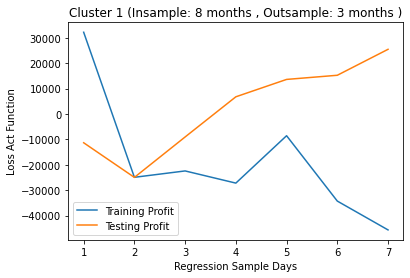

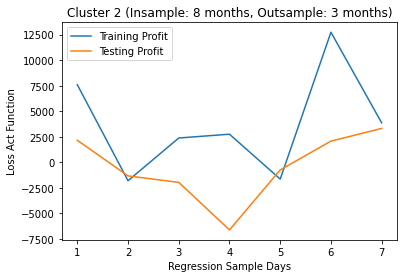

In [22]:
import matplotlib.pyplot as plt
epochs = len(coin1_train)
x_axis = range(1, epochs+1)
# plot Loss Function sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin1_train_loss, label='Training Profit')
ax.plot(x_axis, coin1_test_loss, label='Testing Profit')
ax.legend()
plt.ylabel('Loss Act Function')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 1 (Insample: 8 months , Outsample: 3 months )')
plt.show()
# plot Loss Function sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin2_train_loss, label='Training Profit')
ax.plot(x_axis, coin2_test_loss, label='Testing Profit')
ax.legend()
plt.ylabel('Loss Act Function')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 2 (Insample: 8 months, Outsample: 3 months)')
plt.show()

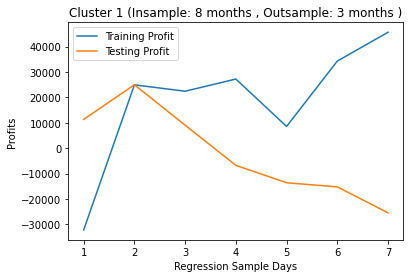

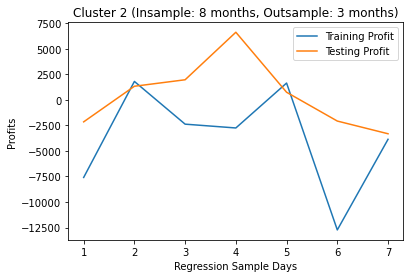

In [21]:
import matplotlib.pyplot as plt
epochs = len(coin1_train)
x_axis = range(1, epochs+1)
# plot Profits sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin1_train, label='Training Profit')
ax.plot(x_axis, coin1_test, label='Testing Profit')
ax.legend()
plt.ylabel('Profits')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 1 (Insample: 8 months , Outsample: 3 months )')
plt.show()
# plot Profits sample for best coin under cluster 1.
fig, ax = plt.subplots()
ax.plot(x_axis, coin2_train, label='Training Profit')
ax.plot(x_axis, coin2_test, label='Testing Profit')
ax.legend()
plt.ylabel('Profits')
plt.xlabel('Regression Sample Days')
plt.title('Cluster 2 (Insample: 8 months, Outsample: 3 months)')
plt.show()

For coin 1 and coin2: Day 2 regression sample is best.
